# Value Iteration

## I. Core Functions
### We want to have utility functions that can help us transitioning between states and get rewards from an action.
### We also want to calculate the expected utility of an action given transition-reward dynamics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 'g' stands for green (+1)
# '0' stands for white (-0.04)
# 'b' stands for brown (-1)
# 'w' stands for walls (Wall)
# 's' stands for start (Start)

#get reward from symbol
def get_reward(position,map):
    symbol = map[position[0]][position[1]]
    if symbol=='g':    
            return 1
    elif symbol=='0':    
            return -0.04
    elif symbol=='b':    
            return -1
    else:
            return 0

#get possible action from position
def get_value(position,state_value):

    return state_value[position[0]][position[1]]

#get destination from position and action
def get_destination(position,action,map):

    if (position[0]+action[0] < 0) or (position[0]+action[0] > 5) or (position[1]+action[1] < 0) or (position[1]+action[1] > 5) or  map[position[0]+action[0]][position[1]+action[1]]=='w':
        new_position= position
    else:
        new_position = [position[0] + action[0], position[1] + action[1]]

    return new_position

def value_of_action(position,action,map):
    if action[0] == 0:
        action1 = [1 ,0]
        action2 = [-1,0]
    else:
        action1 = [0 , 1]
        action2 = [0 ,-1]

    straight_value = get_value(get_destination(position,action,map),state_value)*GAMMA + get_reward(get_destination(position,action,map),map)
    turn_value1 = get_value(get_destination(position,action1,map),state_value)*GAMMA + get_reward(get_destination(position,action1,map),map)
    turn_value2 = get_value(get_destination(position, action2, map),state_value)*GAMMA + get_reward(get_destination(position,action2,map),map)

    average_value = straight_value*0.8 + (turn_value1 + turn_value2)*0.1

    return average_value



## II. Graphics Functions
### These are graphics functions that will help us print out tables later.

In [2]:
def display_2d_list_with_highlight(matrix, highlight_index):
    cmap = plt.cm.get_cmap("viridis").copy()
    cmap.set_bad(color='grey')  # Set color for highlighted element

    highlighted_matrix = np.array(matrix, dtype=float)
    
    for highlighted_index in highlight_index:
        highlighted_matrix[highlighted_index[0], highlighted_index[1]] = np.nan
        
    plt.imshow(highlighted_matrix, cmap=cmap, interpolation='nearest', vmin=np.nanmin(matrix), vmax=np.nanmax(matrix))
    plt.title("Utility Map through Iterations")
    plt.colorbar()
    plt.show()


def get_wall_list(map):
    wall_list=[]
    for row in range(6):
        for column in range(6):
            if map[row][column] == 'w':
                wall_list.append([row,column])
    return wall_list

def print_state_utility(state_value,wall_list):
    for row in range(6):
        for column in range(6):
            if [row,column] in wall_list:
                print('Wall',end = '\t')
            else:
                print(state_value[row][column], end="\t")  
        print()  

def print_policy(policy_table,wall_list):
    for row in range(6):
        for column in range(6):
            element = policy_table[row][column]
    
            if [row,column] in wall_list:
                print('Wall',end = '\t')
                continue
            elif element == [0,-1]:
                action = 'Left'
            elif element == [0,1]:
                action = 'Right'
            elif element == [-1, 0 ]:
                action = 'Up'
            else:
                action = 'Down'
            print(action,end="\t")  
        print()          
        
#########################################


## III. Problem-specific data
### Here we input our map layout, as well as initializing utility table and policy table.
### We also get our discount factor and accuracy threshold variable for later iterations.

In [3]:

# (row,column) format
map= [
    ['g','w','g','0','0','g'],
    ['0','b','0','g','w','b'],
    ['0','0','b','0','g','0'],
    ['0','0','s','b','0','g'],
    ['0','w','w','w','b','0'],
    ['0','0','0','0','0','0'],
    ]

#initialize_state_value table
state_value = [[0]*6 for i in range(6)]

#initialize policy table
policy_table = [[[0,1] for k in range(6)] for j in range(6)]

#accuracy threshold variable
THETA = 0.01

#Discount factor
GAMMA = 0.99

#Possible Action
action = [
    [0,1], [0,-1], [1,0], [-1,0]
]





## IV. Value Iteration:
### While the absolute error between iterations is not negligible (still changes after an interation):
###     + Choose the best action by look ahead 1 step and re-calculate the new utility value
###     + Get the maximum absolute error for the entire iteration

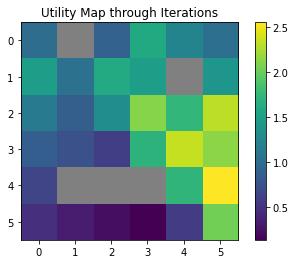

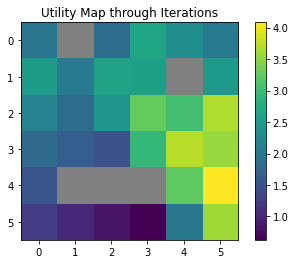

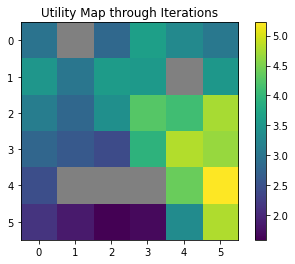

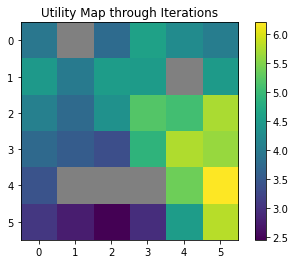

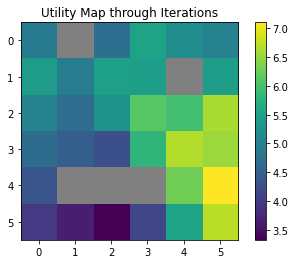

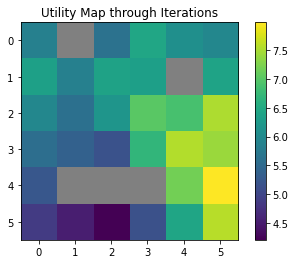

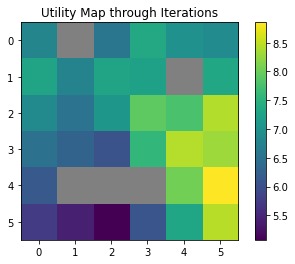

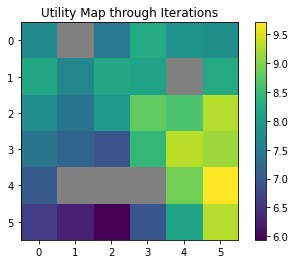

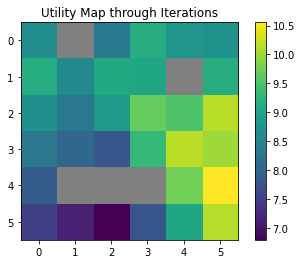

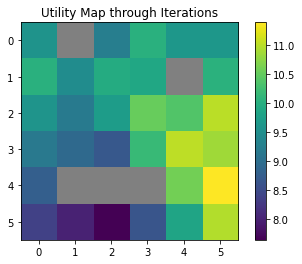

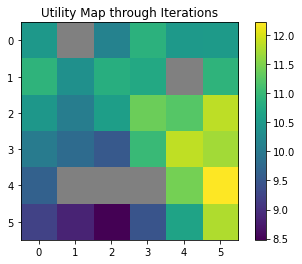

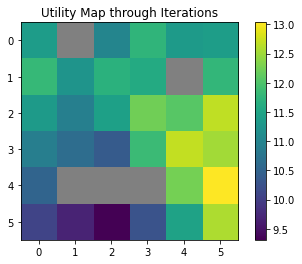

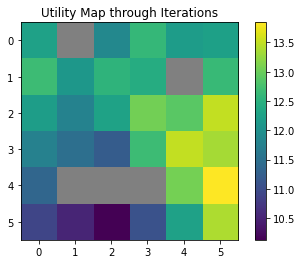

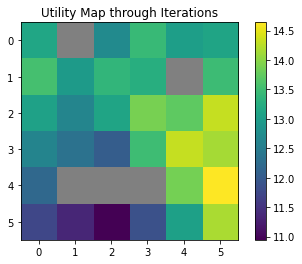

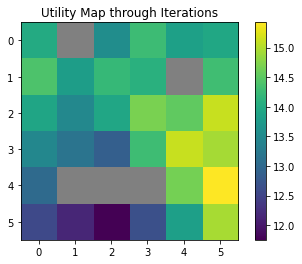

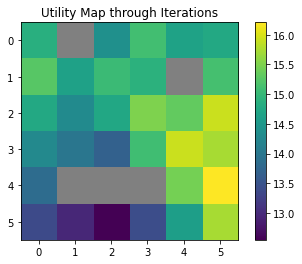

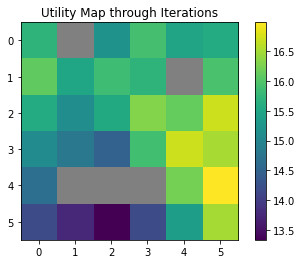

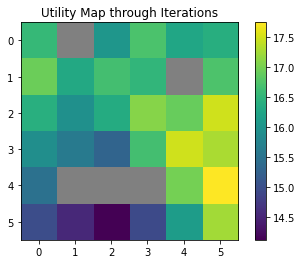

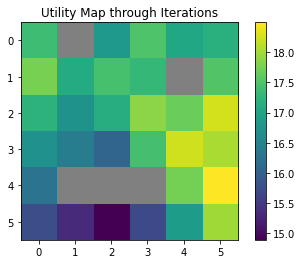

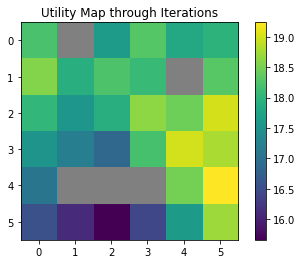

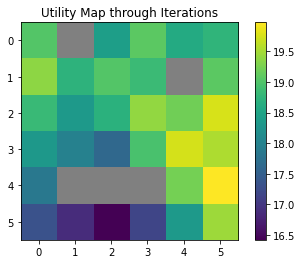

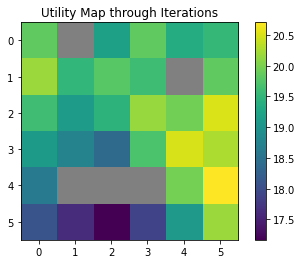

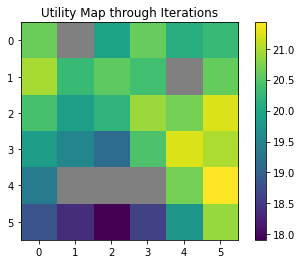

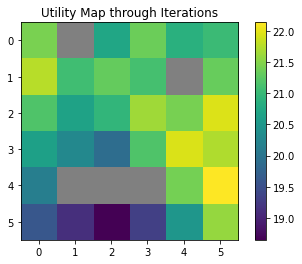

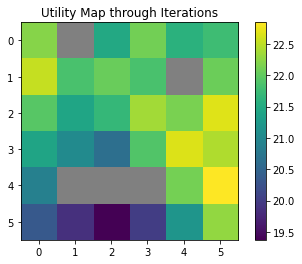

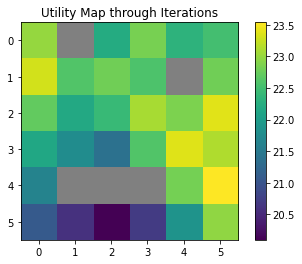

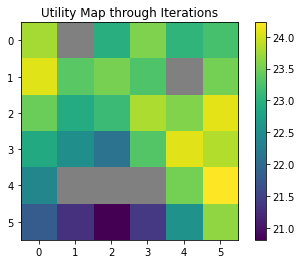

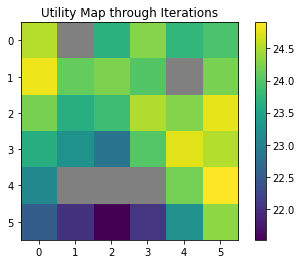

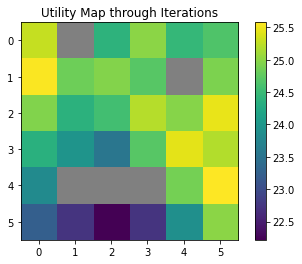

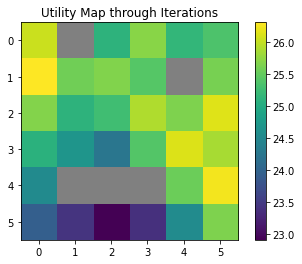

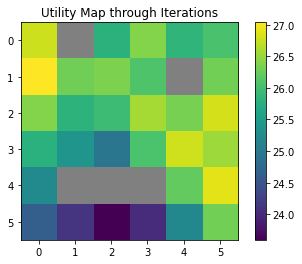

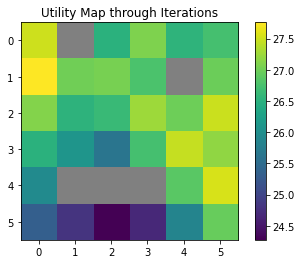

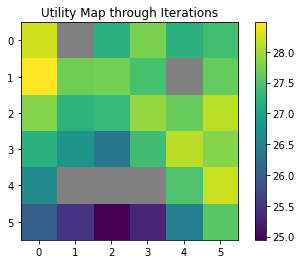

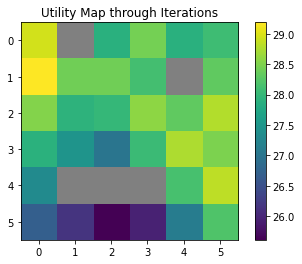

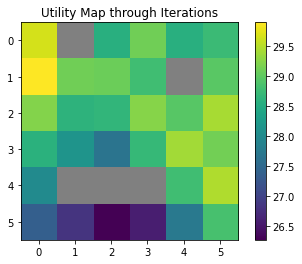

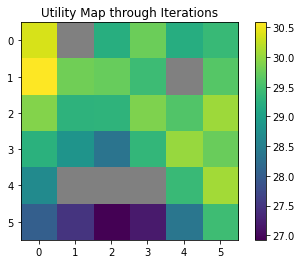

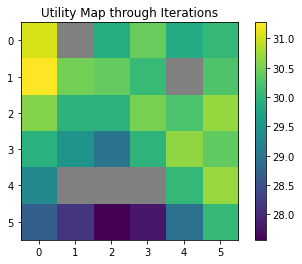

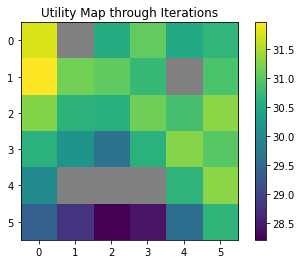

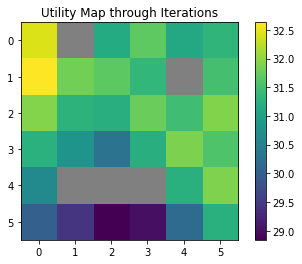

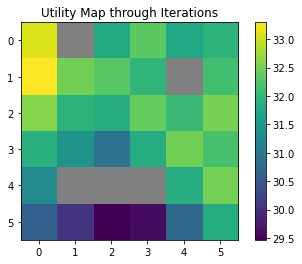

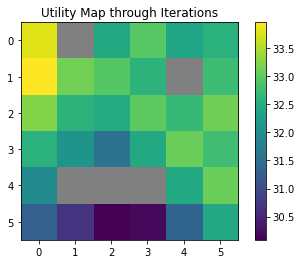

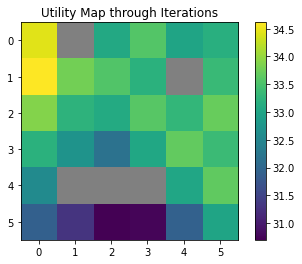

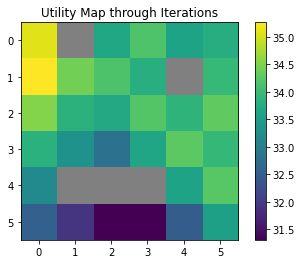

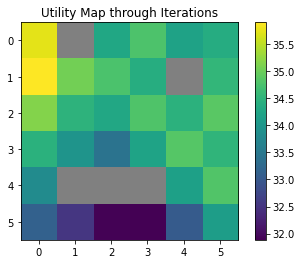

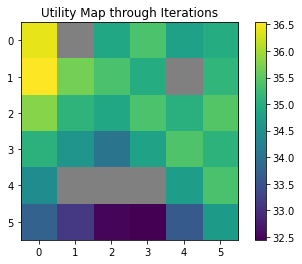

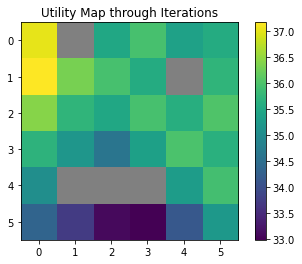

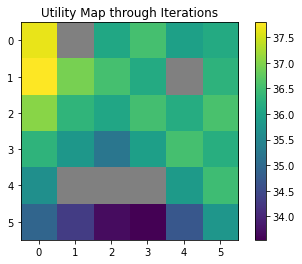

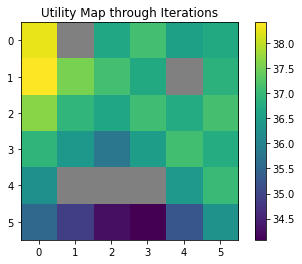

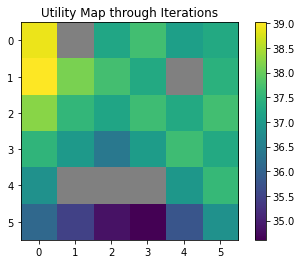

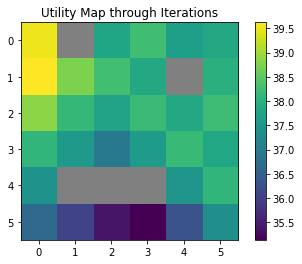

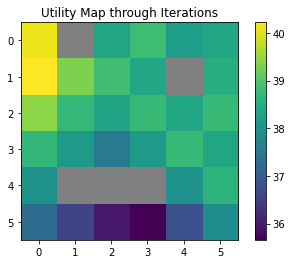

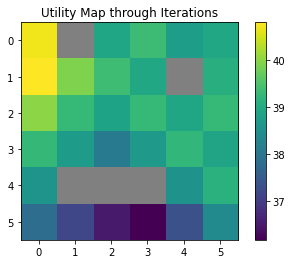

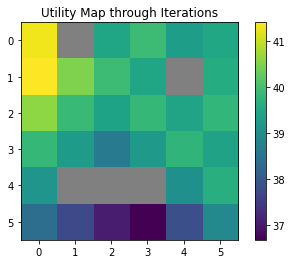

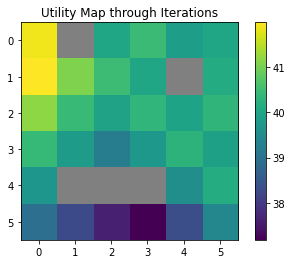

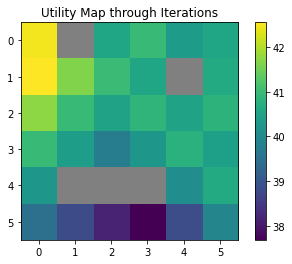

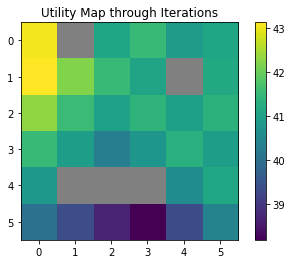

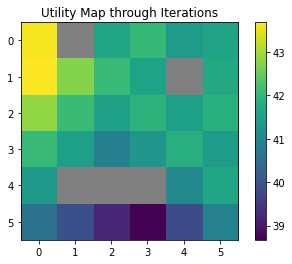

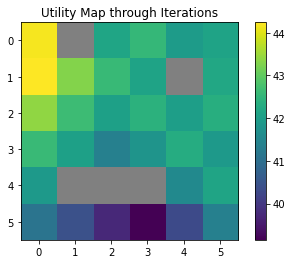

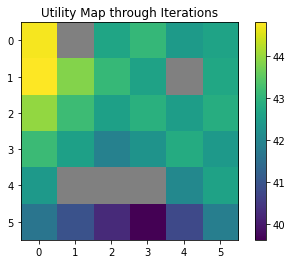

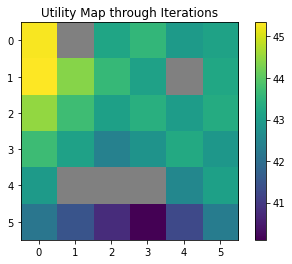

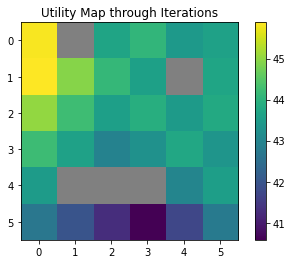

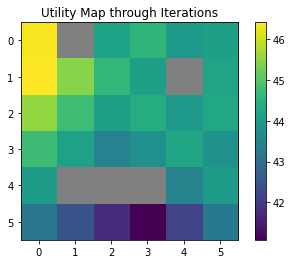

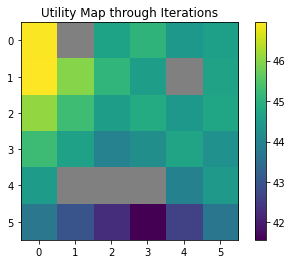

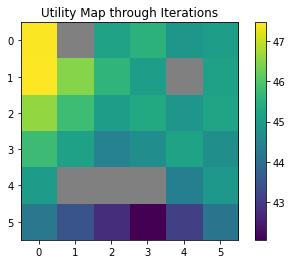

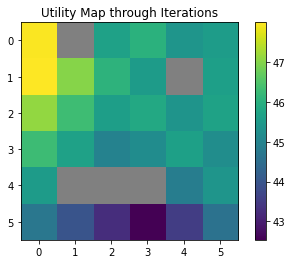

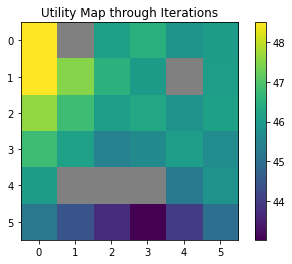

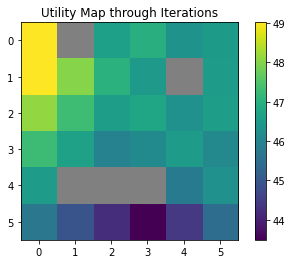

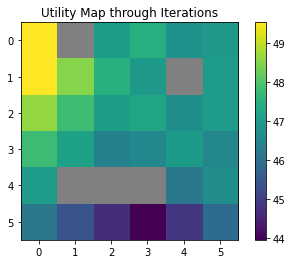

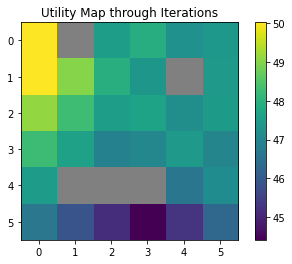

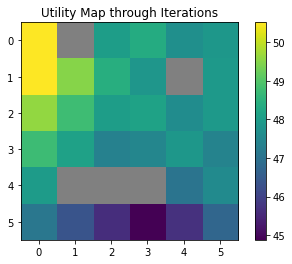

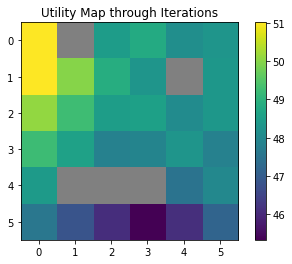

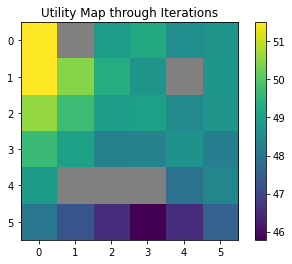

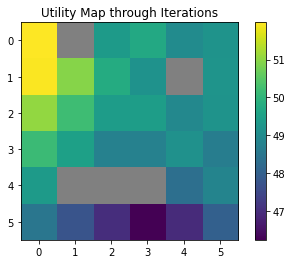

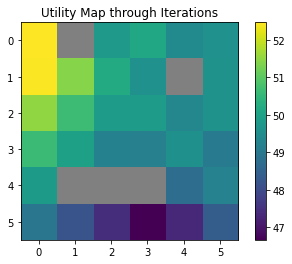

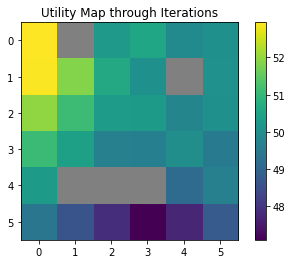

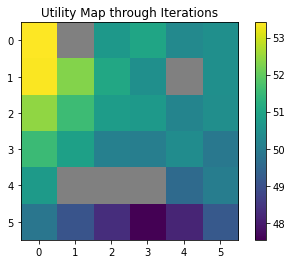

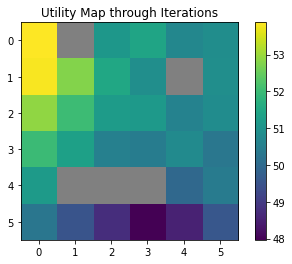

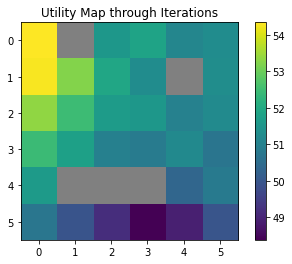

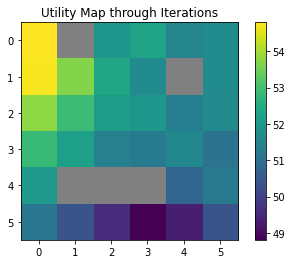

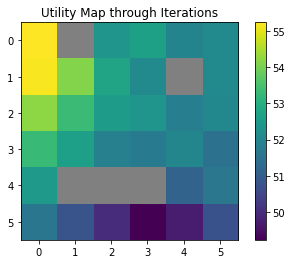

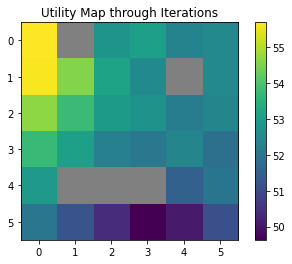

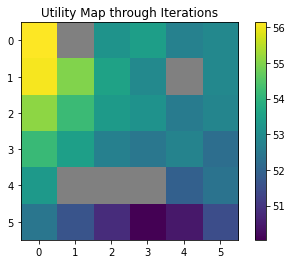

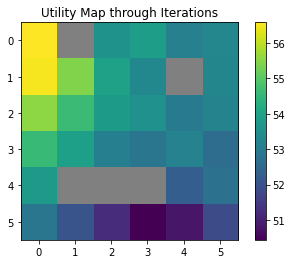

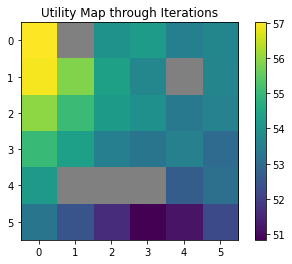

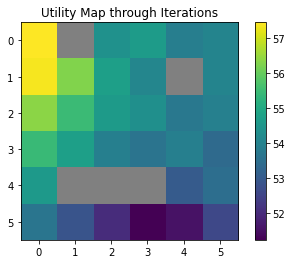

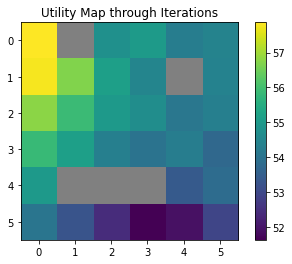

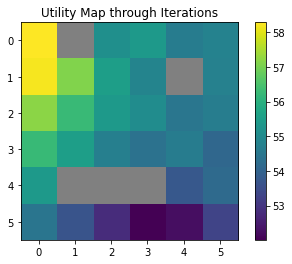

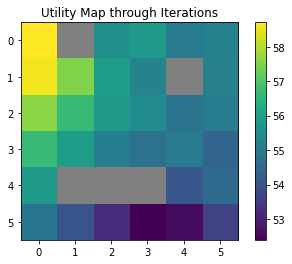

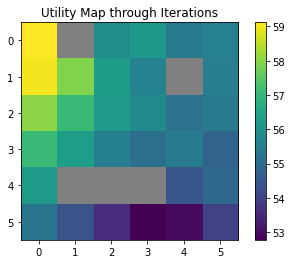

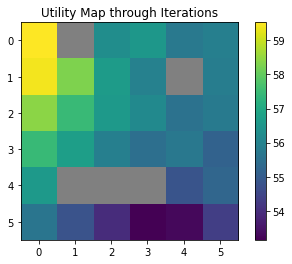

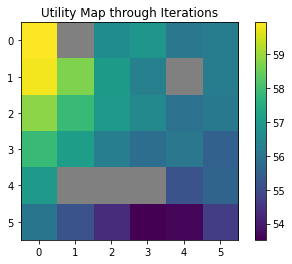

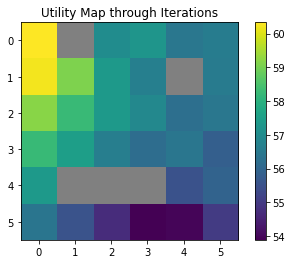

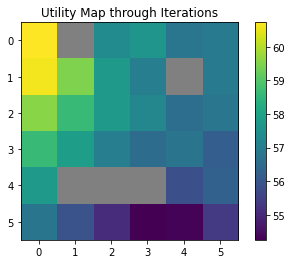

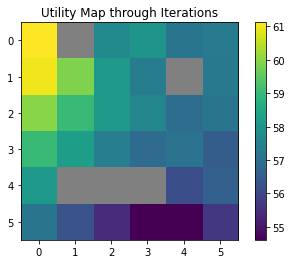

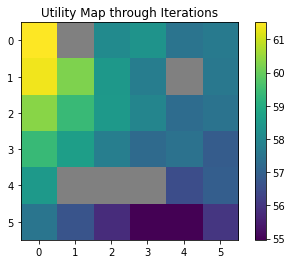

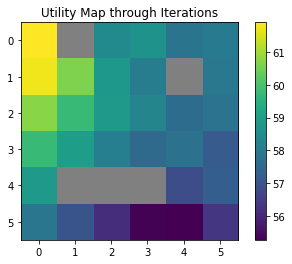

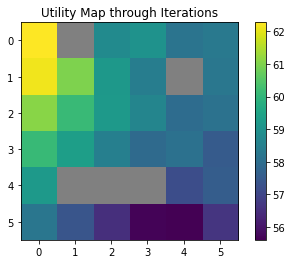

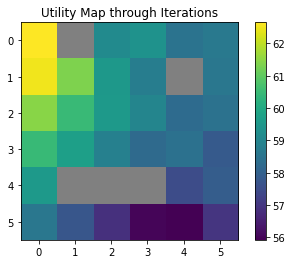

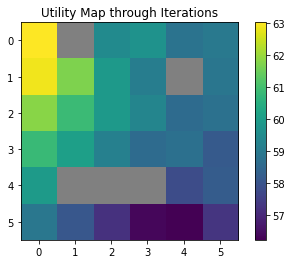

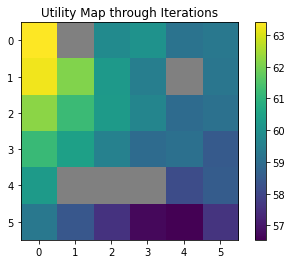

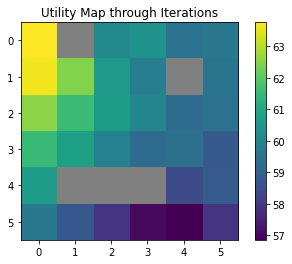

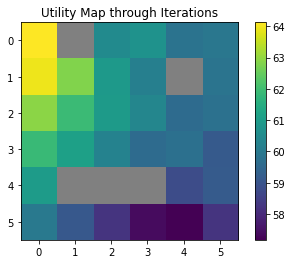

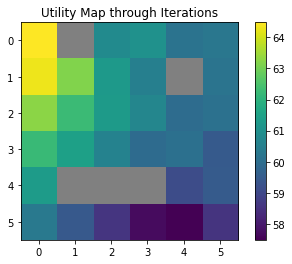

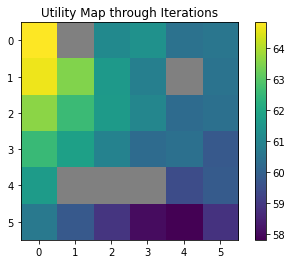

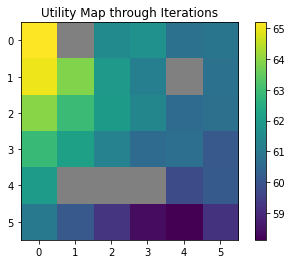

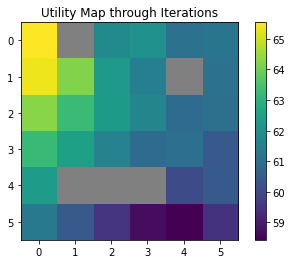

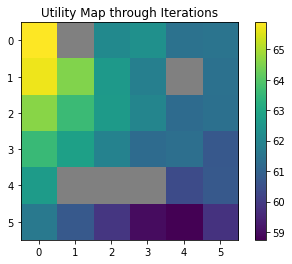

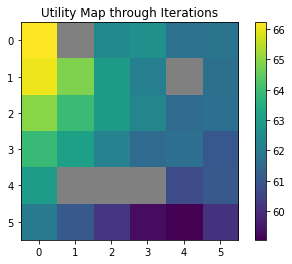

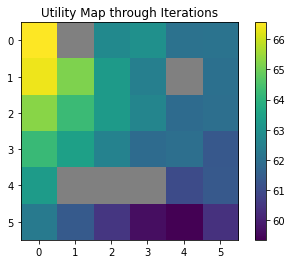

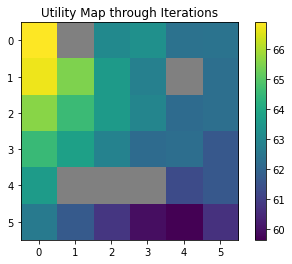

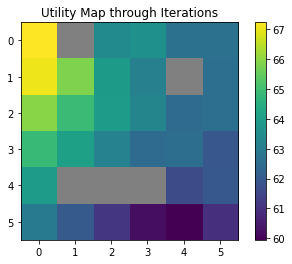

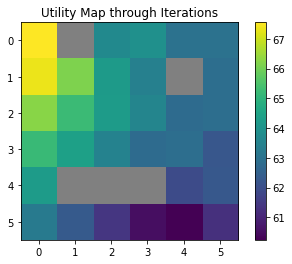

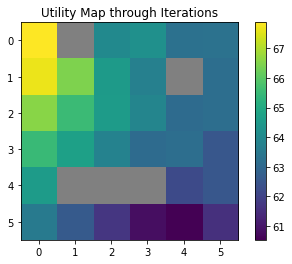

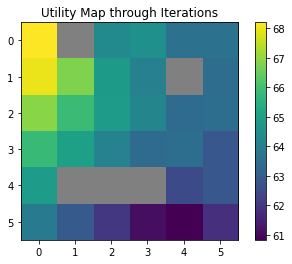

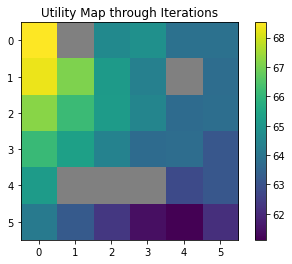

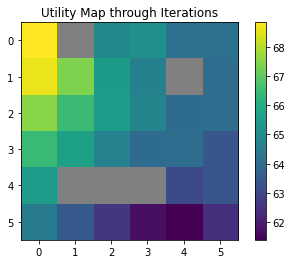

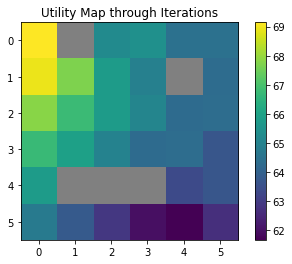

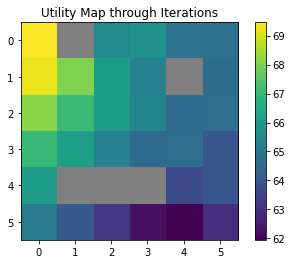

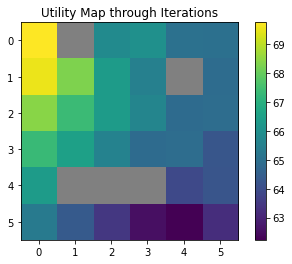

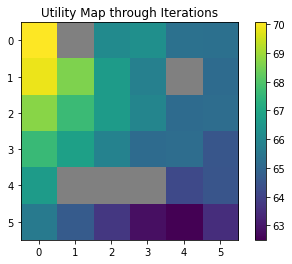

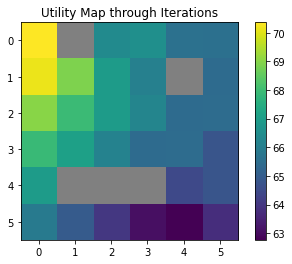

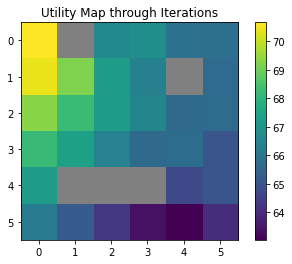

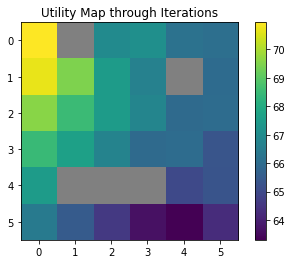

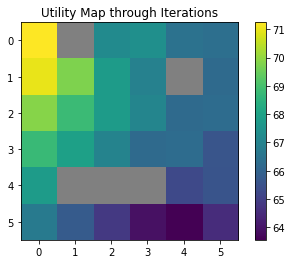

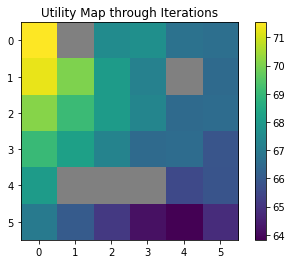

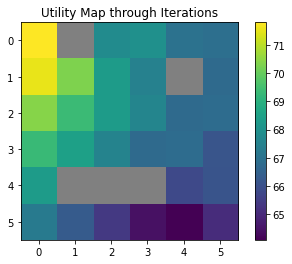

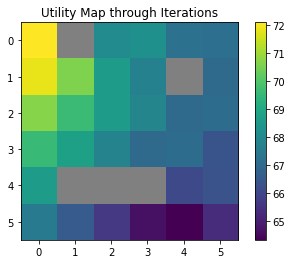

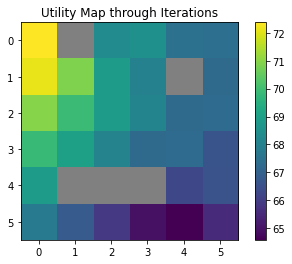

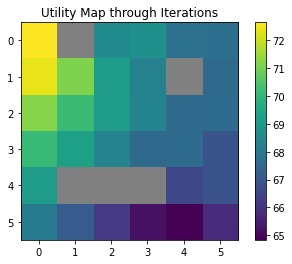

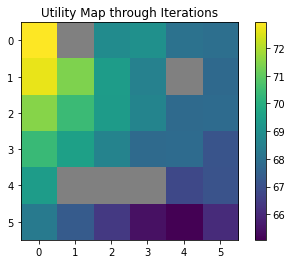

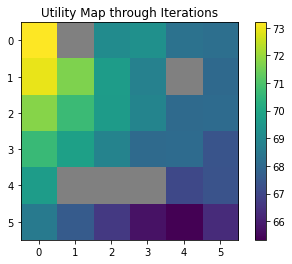

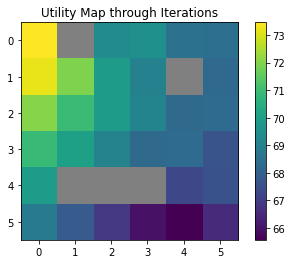

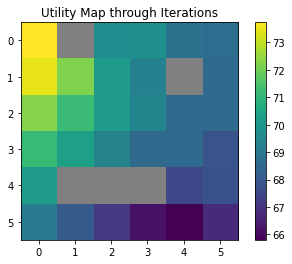

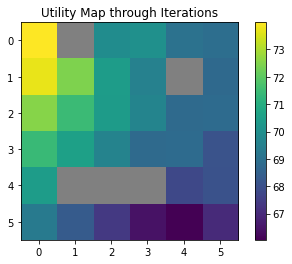

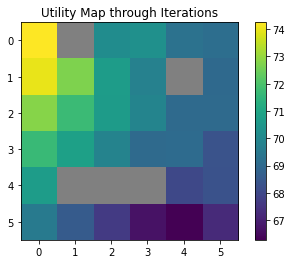

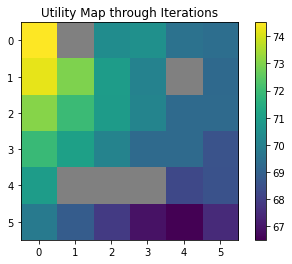

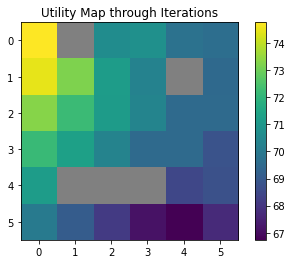

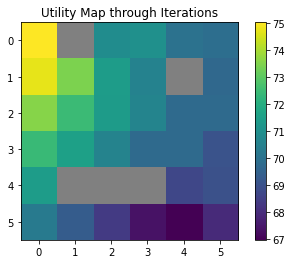

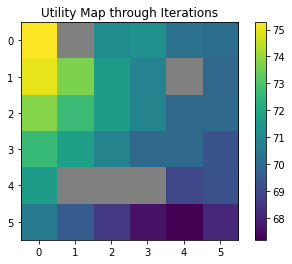

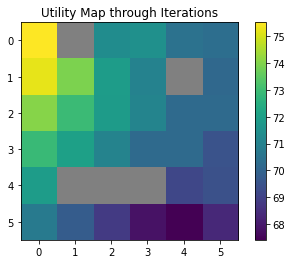

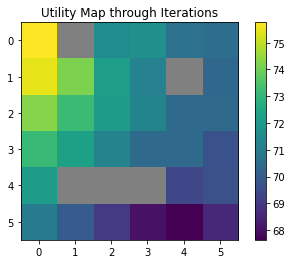

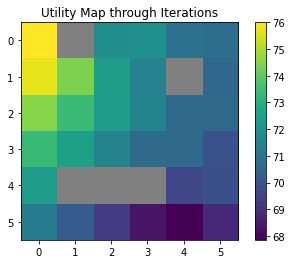

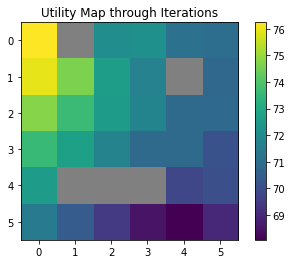

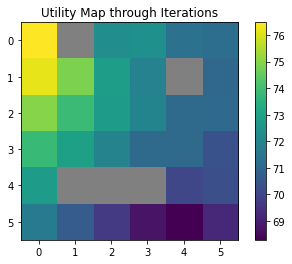

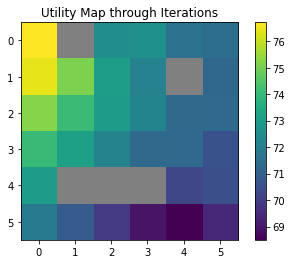

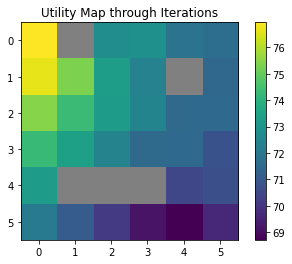

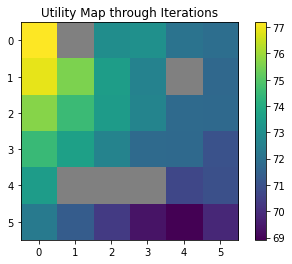

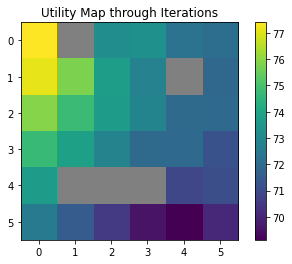

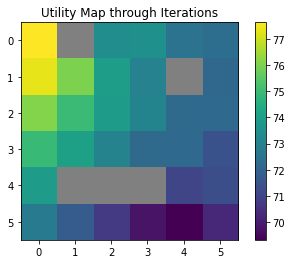

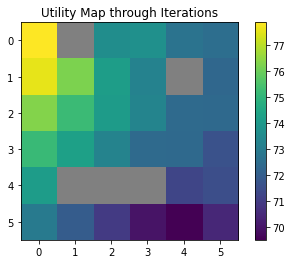

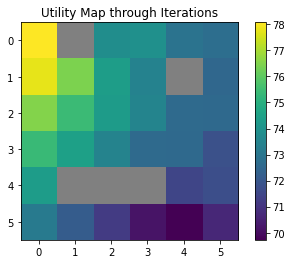

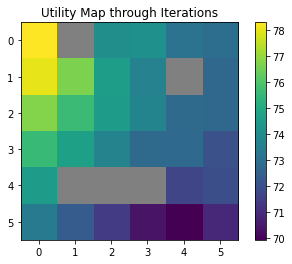

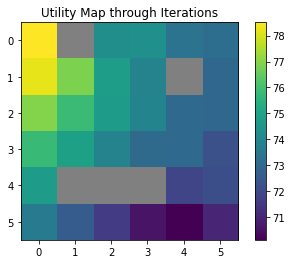

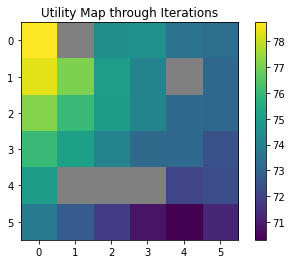

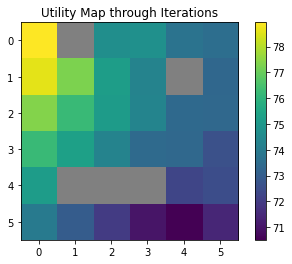

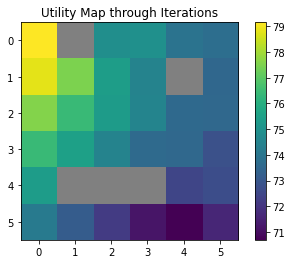

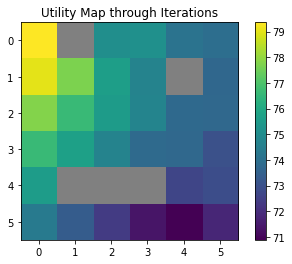

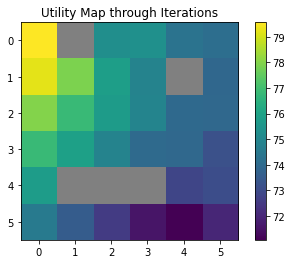

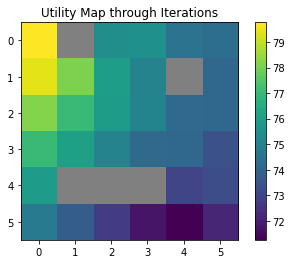

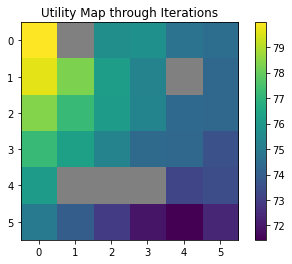

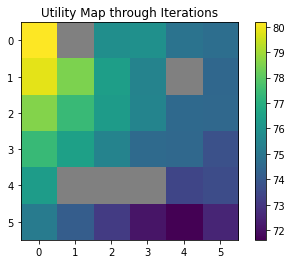

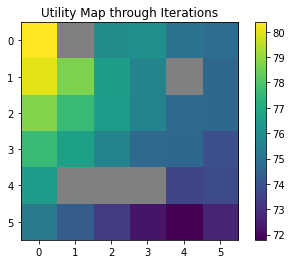

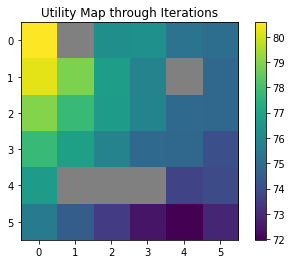

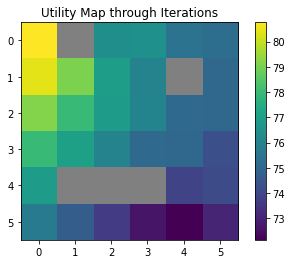

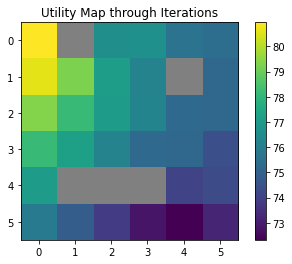

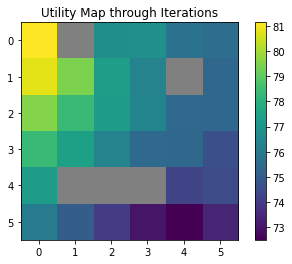

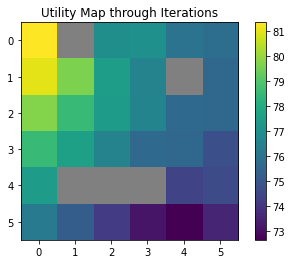

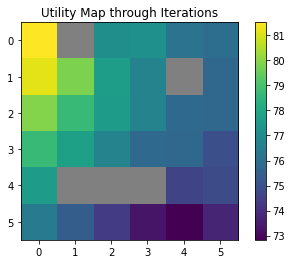

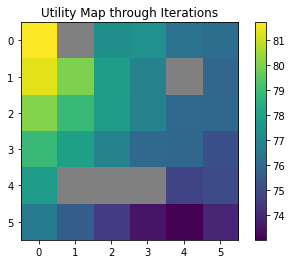

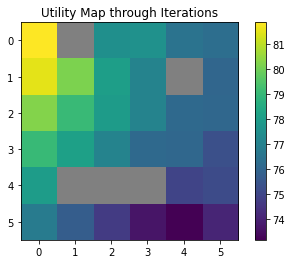

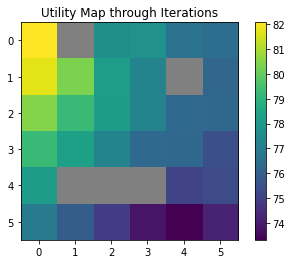

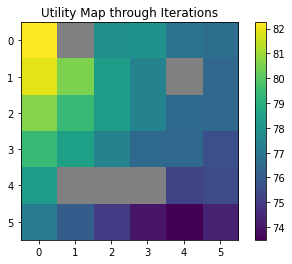

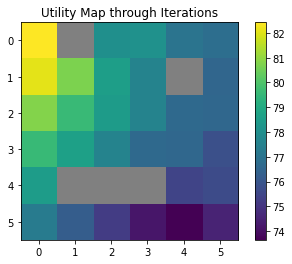

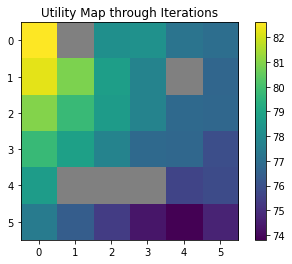

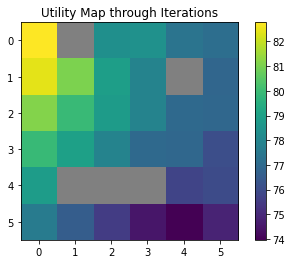

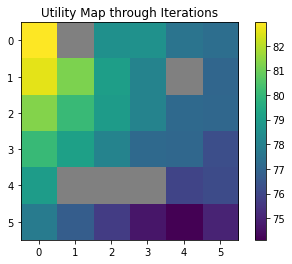

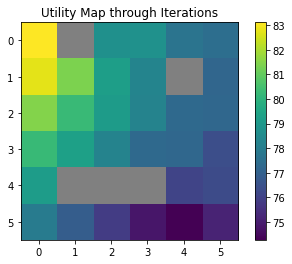

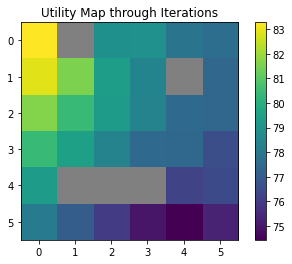

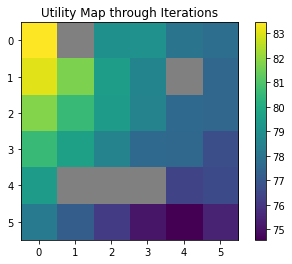

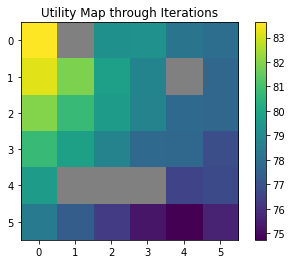

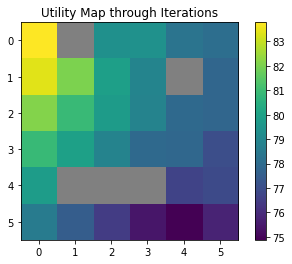

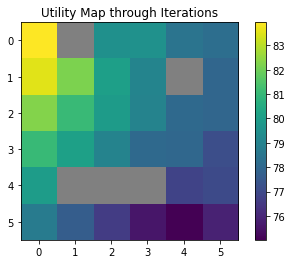

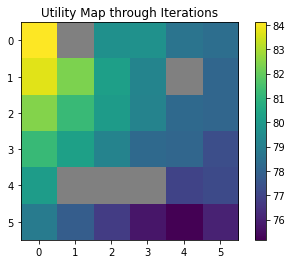

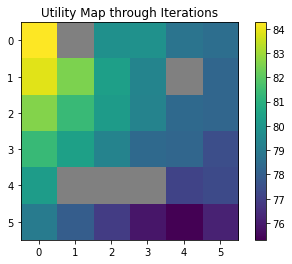

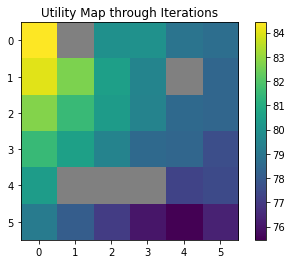

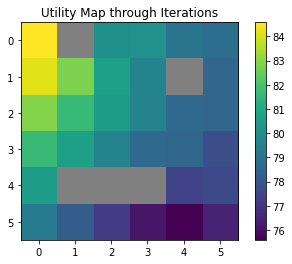

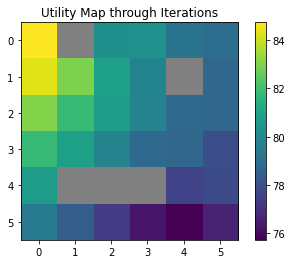

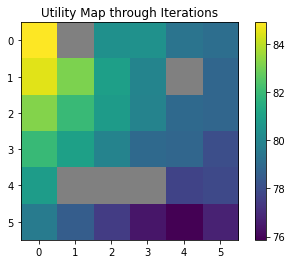

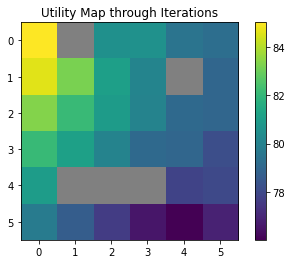

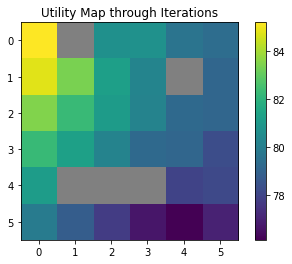

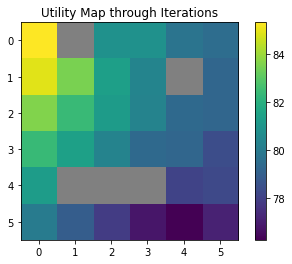

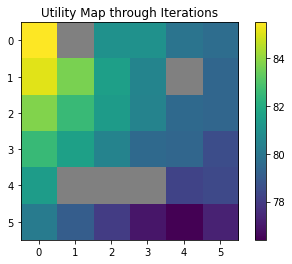

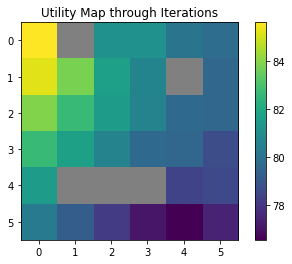

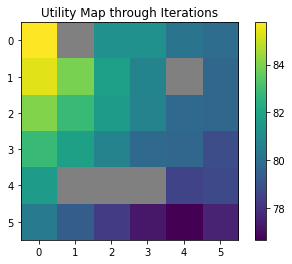

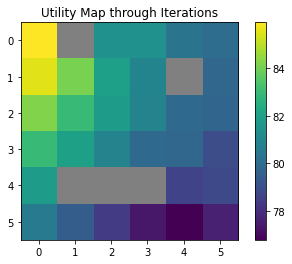

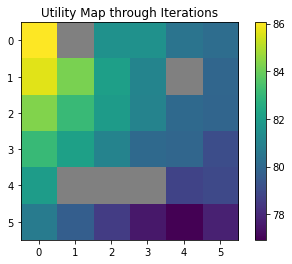

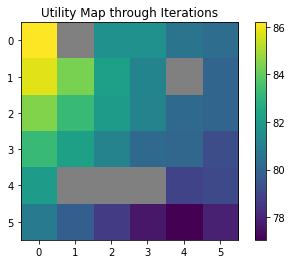

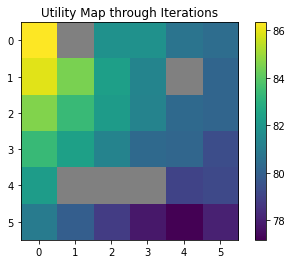

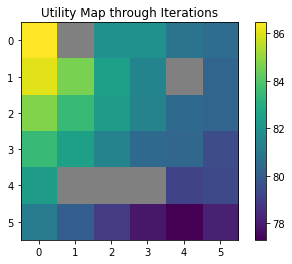

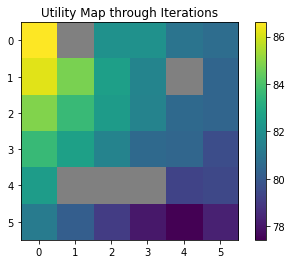

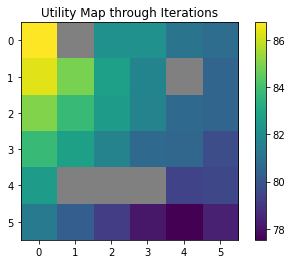

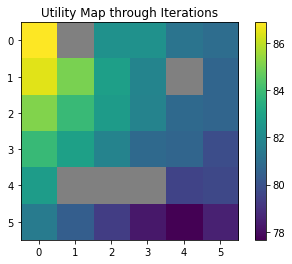

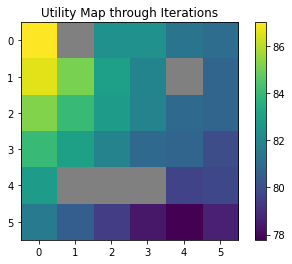

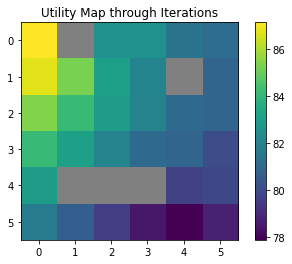

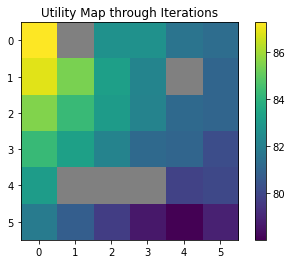

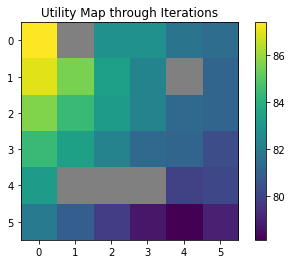

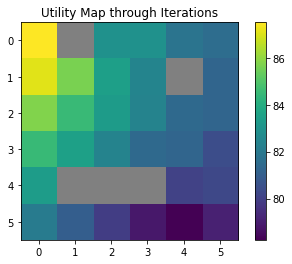

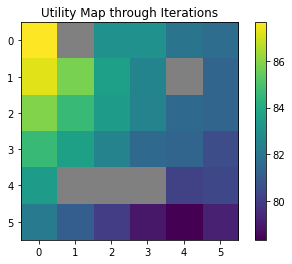

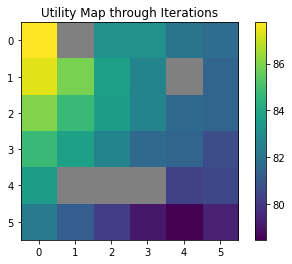

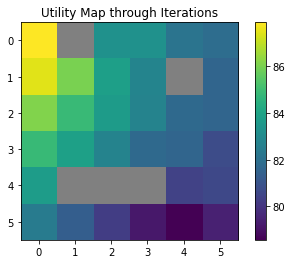

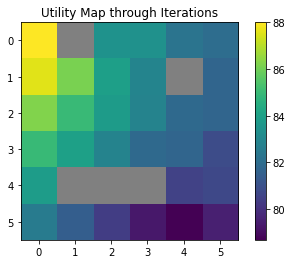

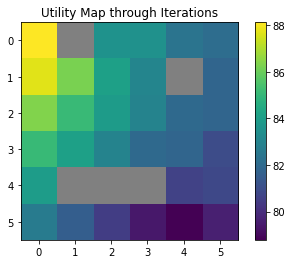

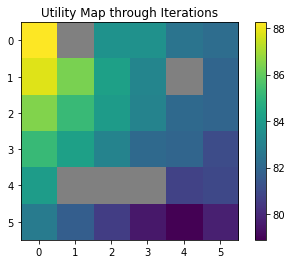

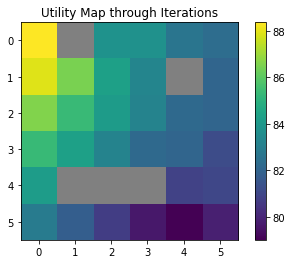

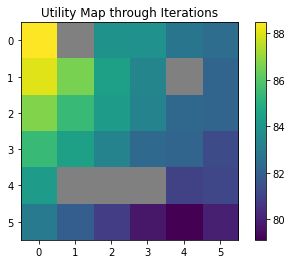

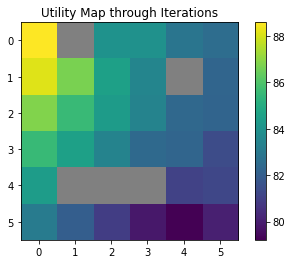

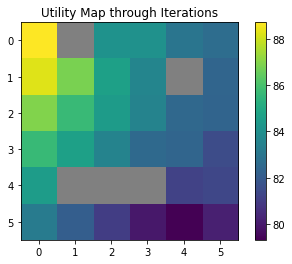

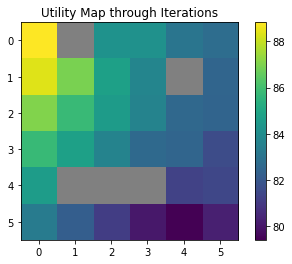

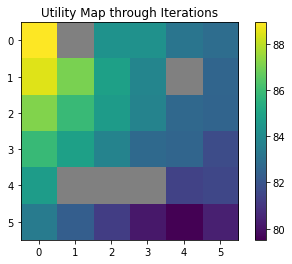

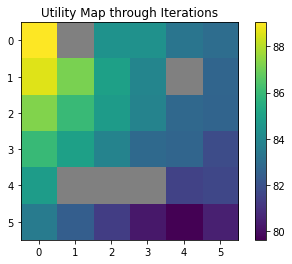

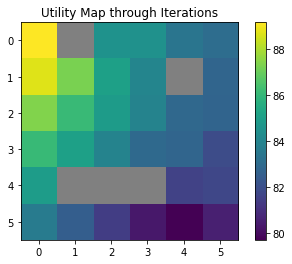

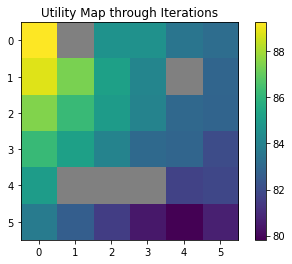

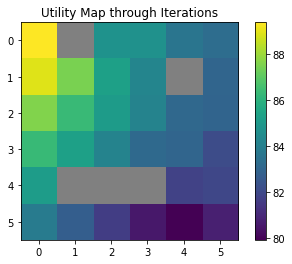

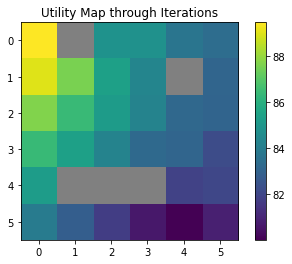

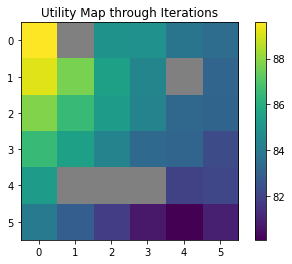

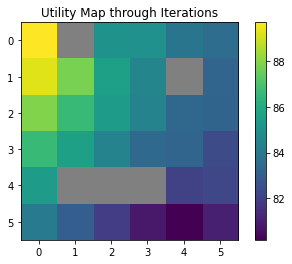

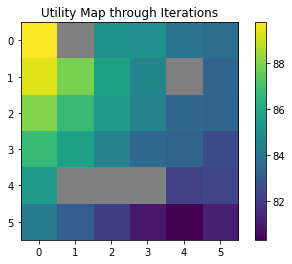

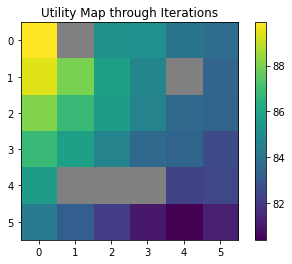

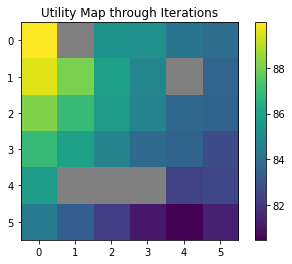

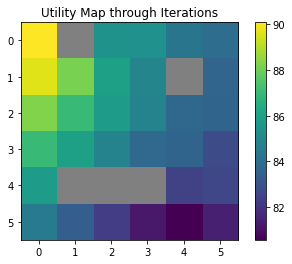

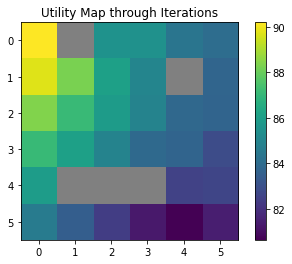

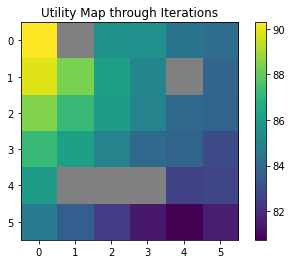

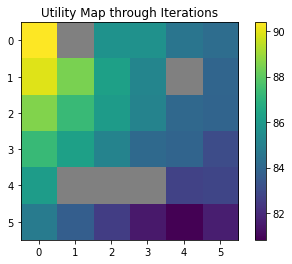

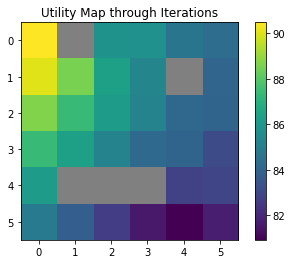

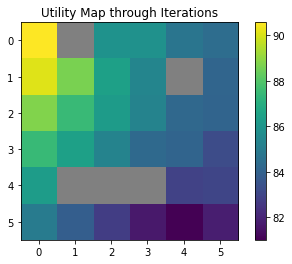

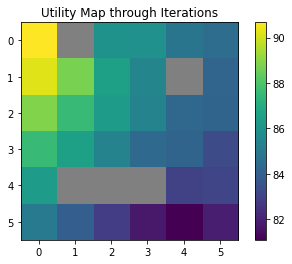

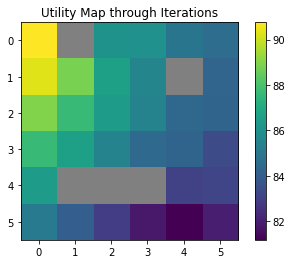

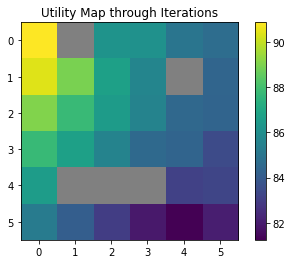

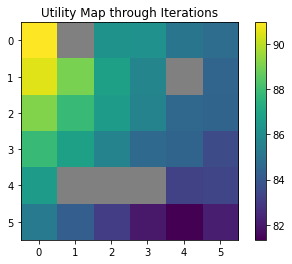

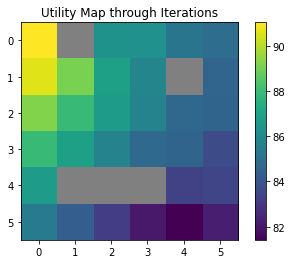

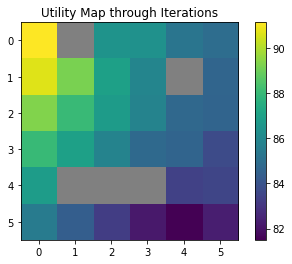

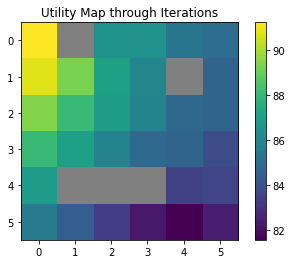

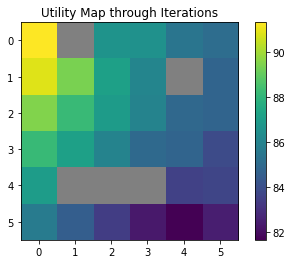

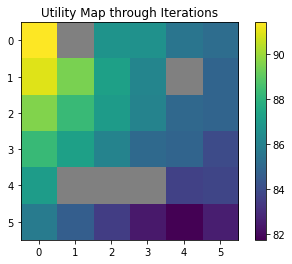

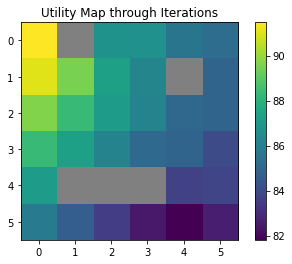

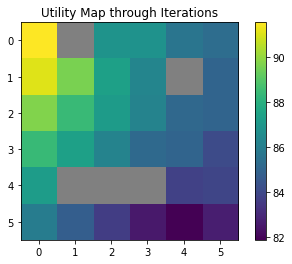

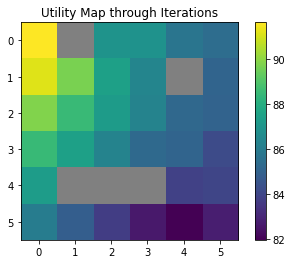

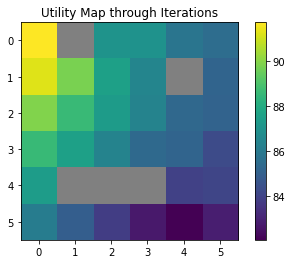

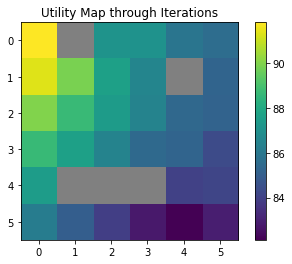

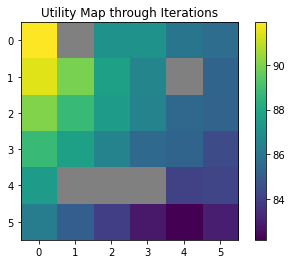

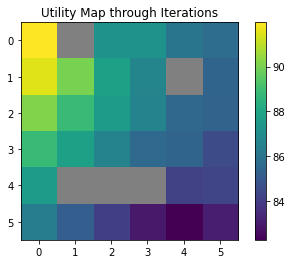

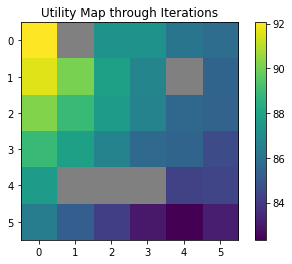

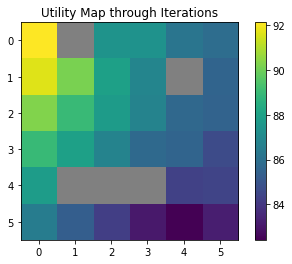

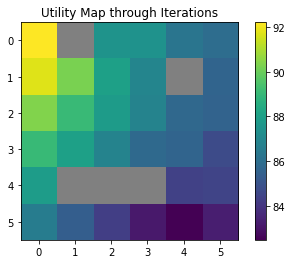

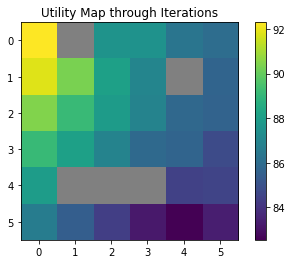

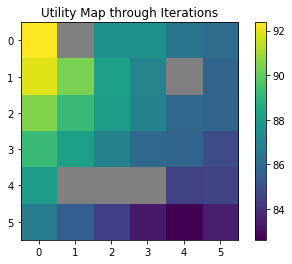

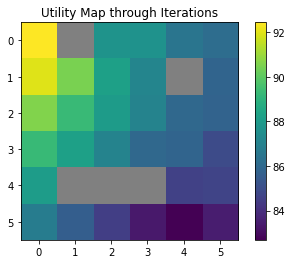

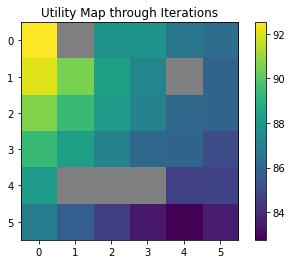

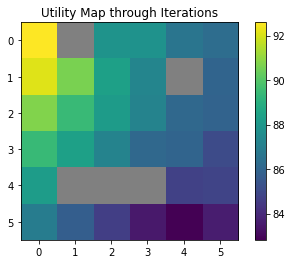

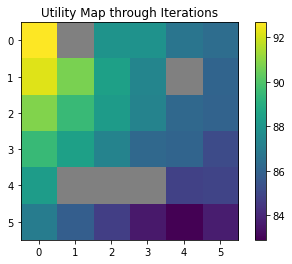

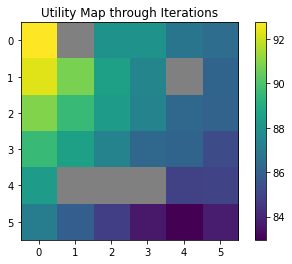

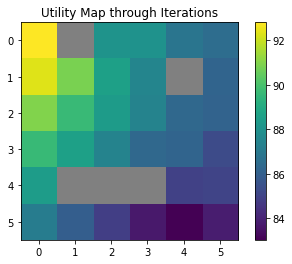

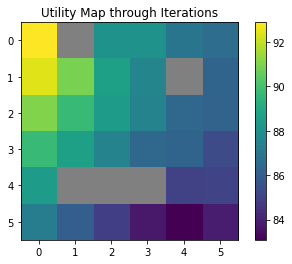

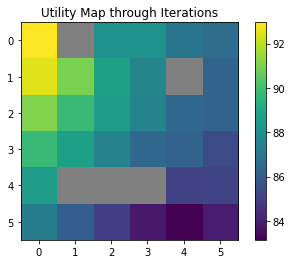

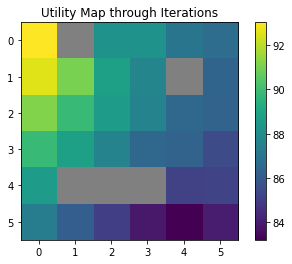

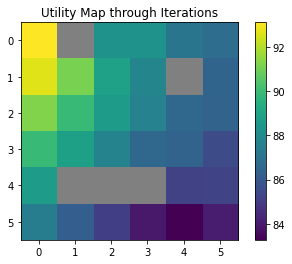

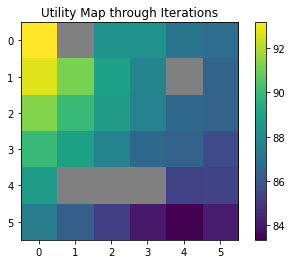

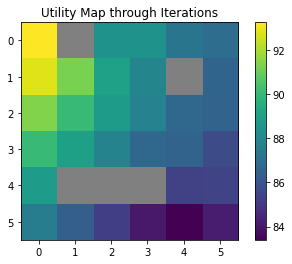

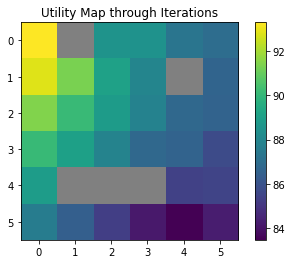

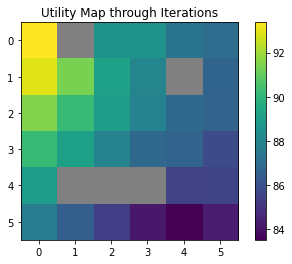

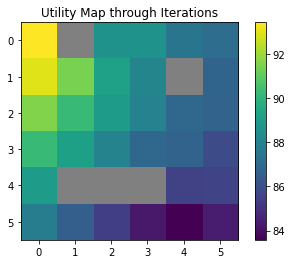

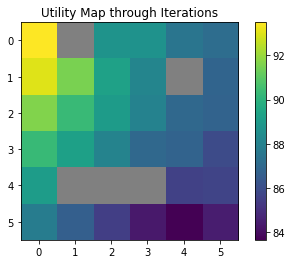

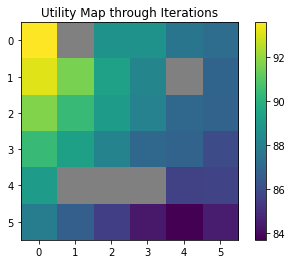

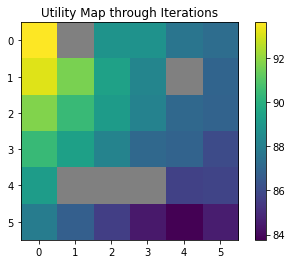

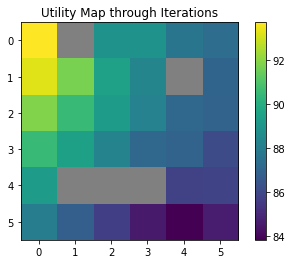

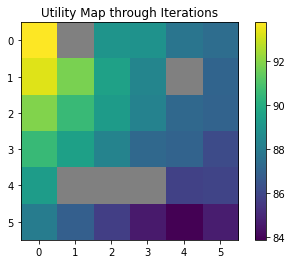

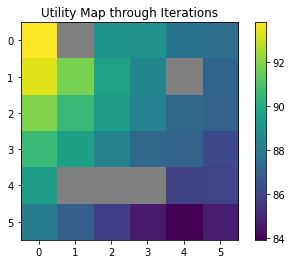

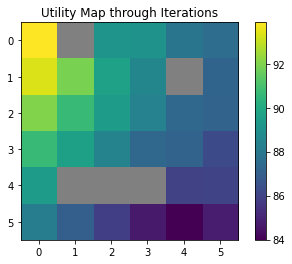

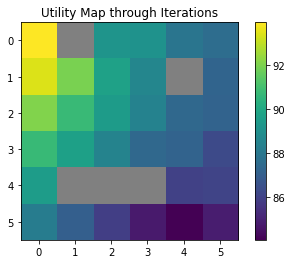

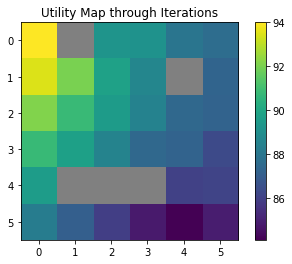

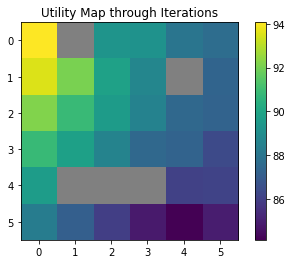

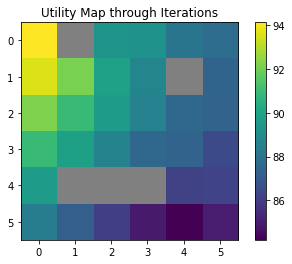

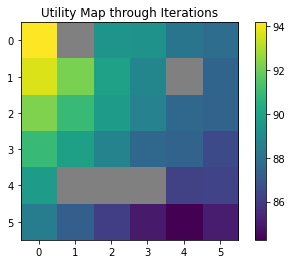

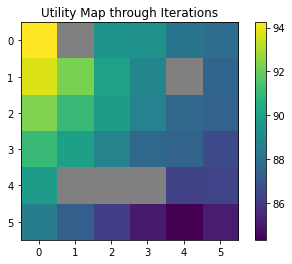

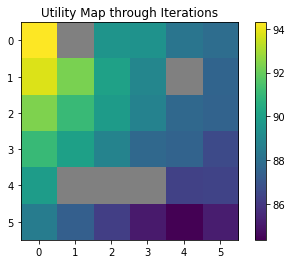

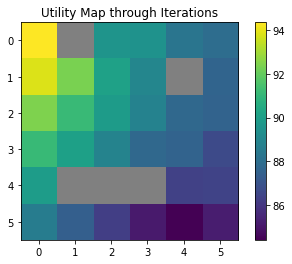

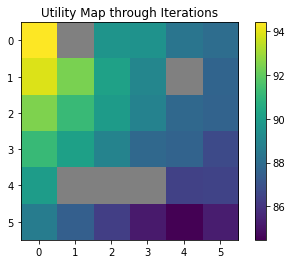

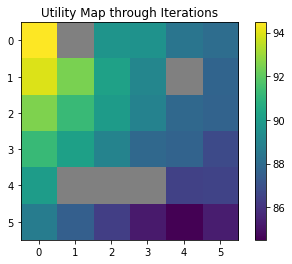

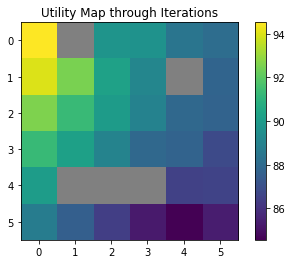

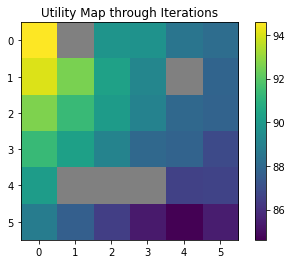

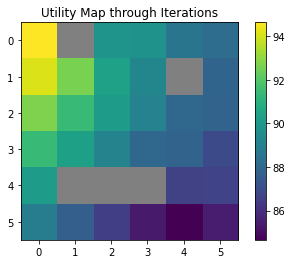

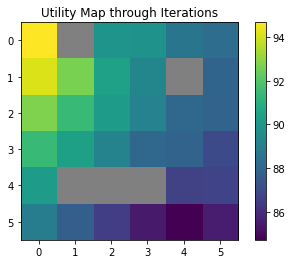

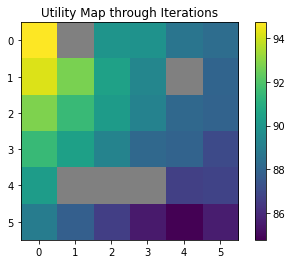

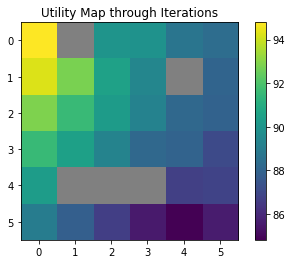

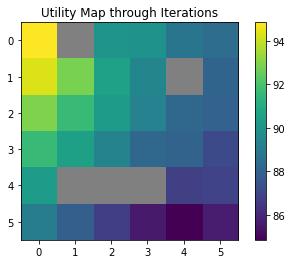

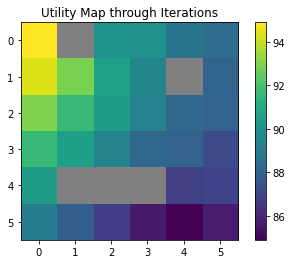

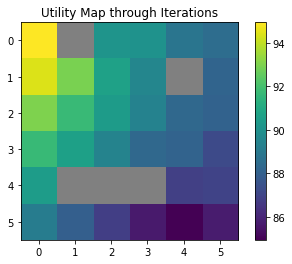

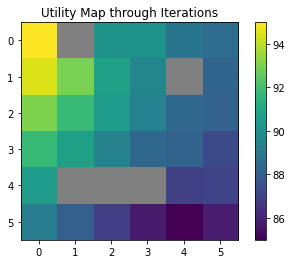

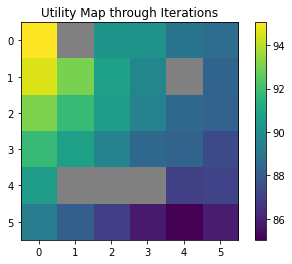

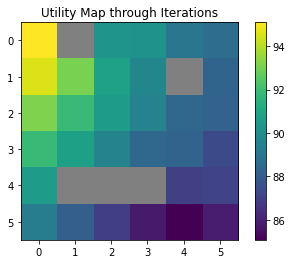

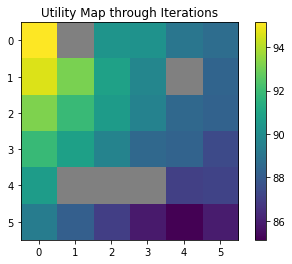

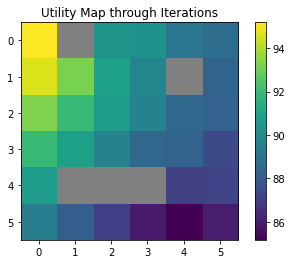

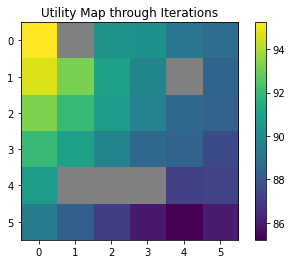

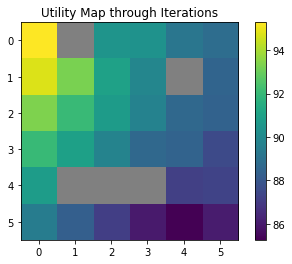

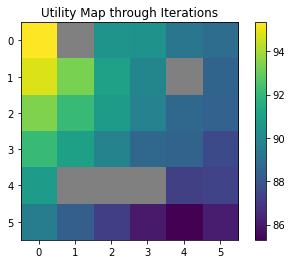

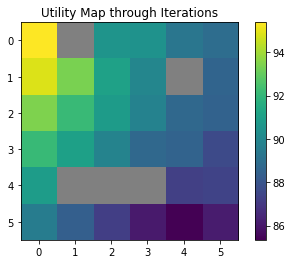

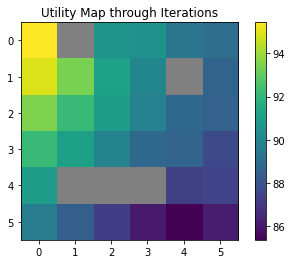

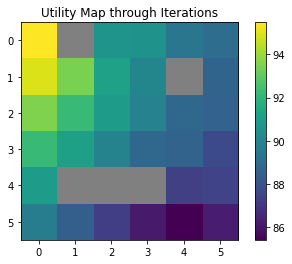

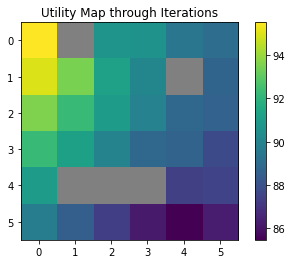

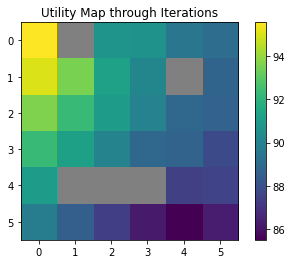

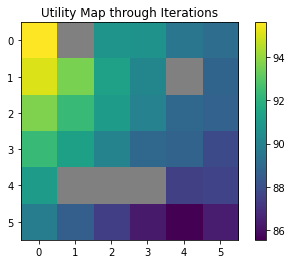

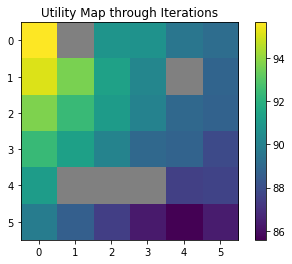

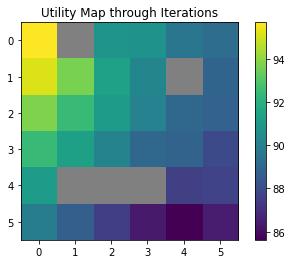

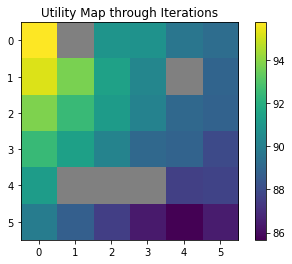

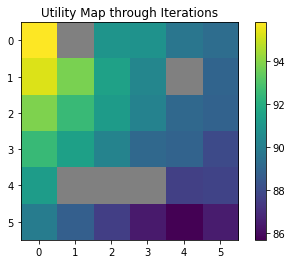

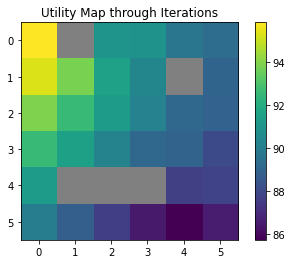

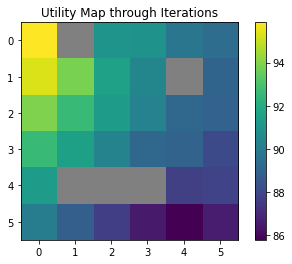

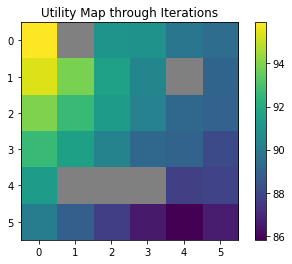

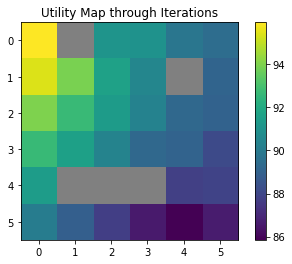

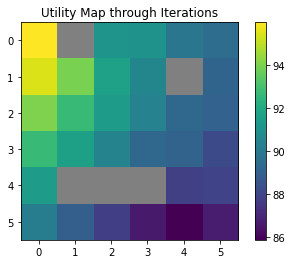

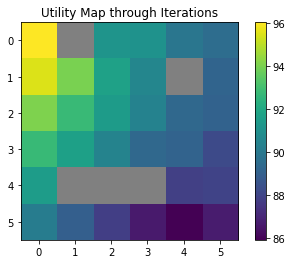

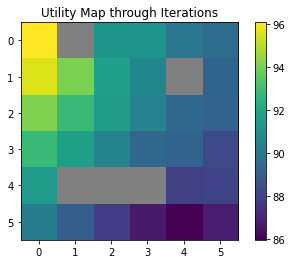

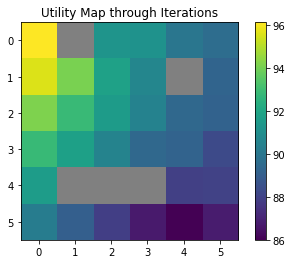

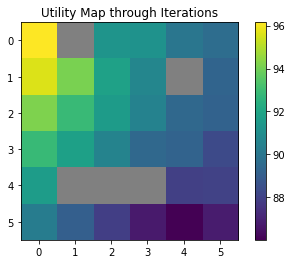

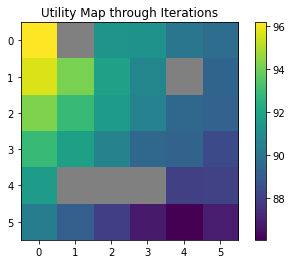

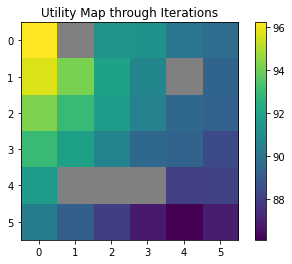

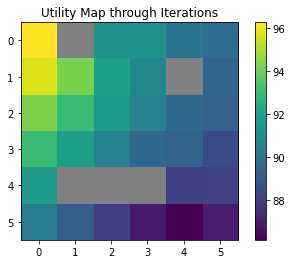

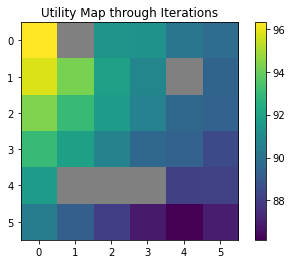

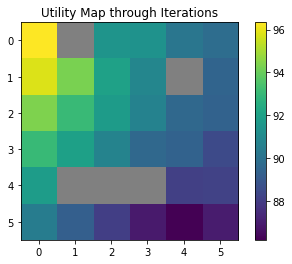

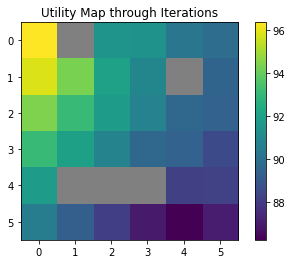

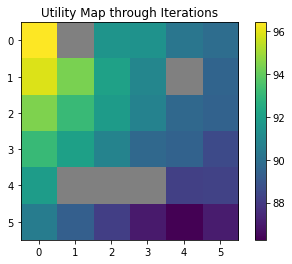

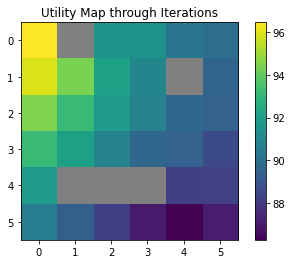

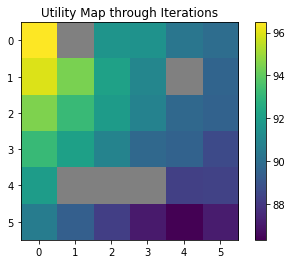

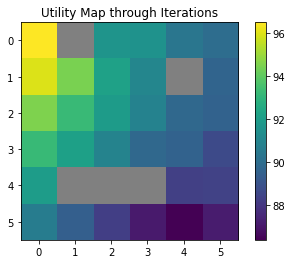

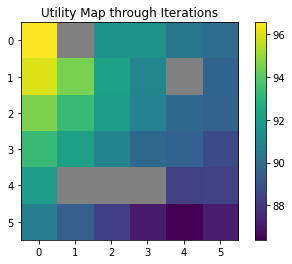

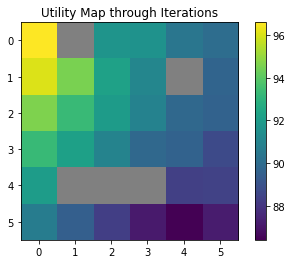

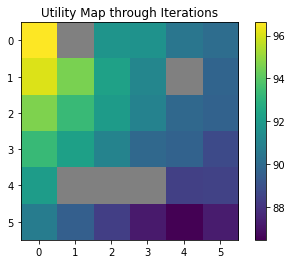

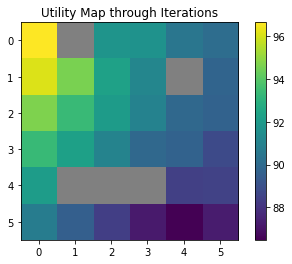

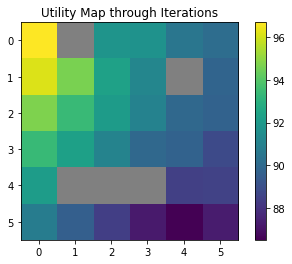

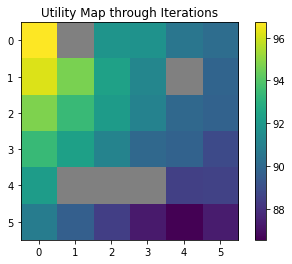

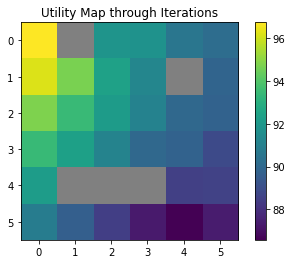

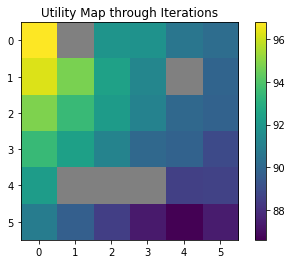

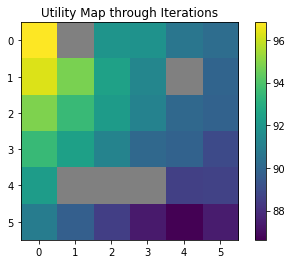

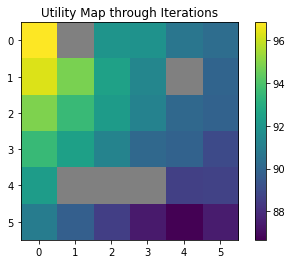

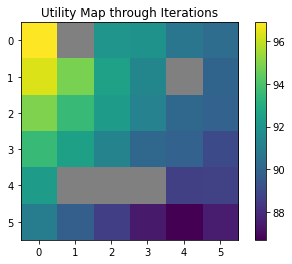

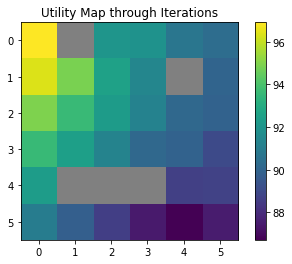

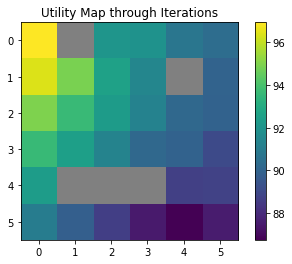

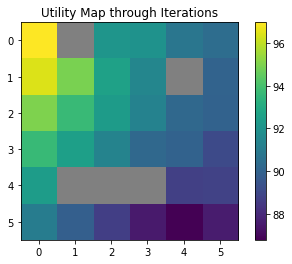

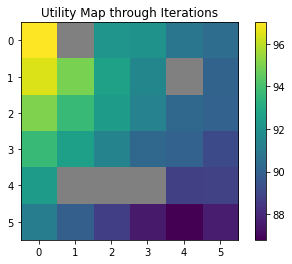

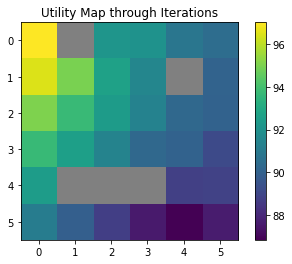

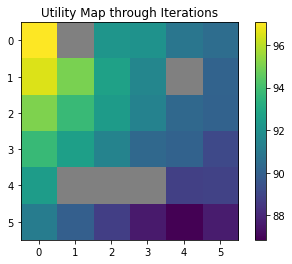

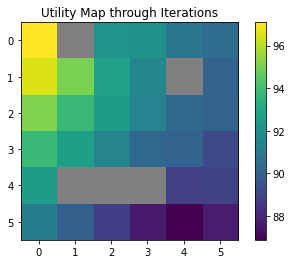

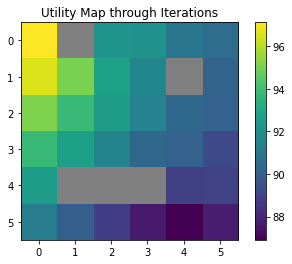

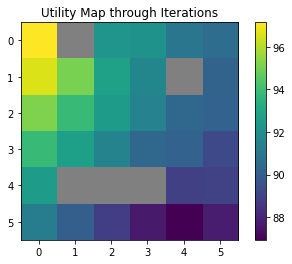

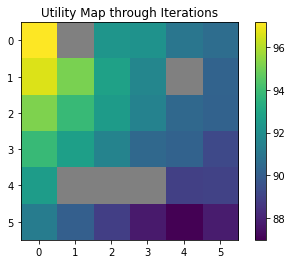

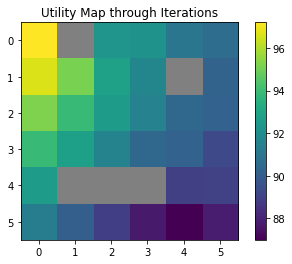

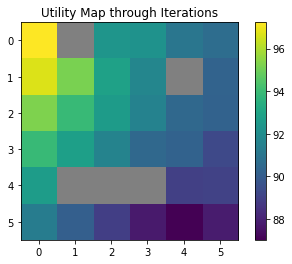

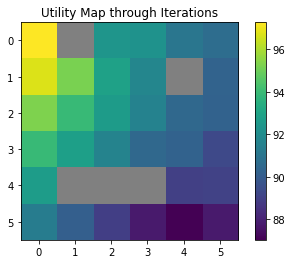

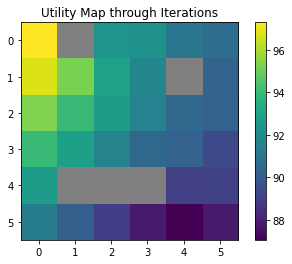

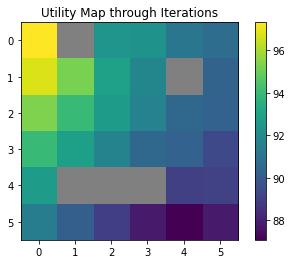

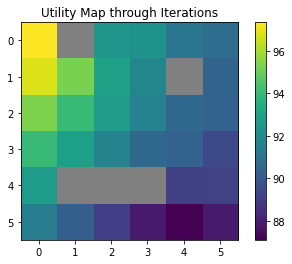

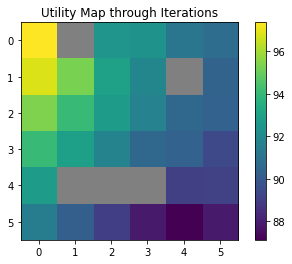

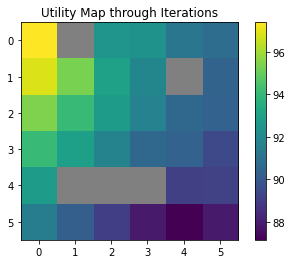

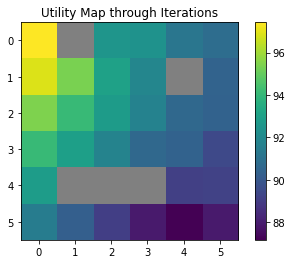

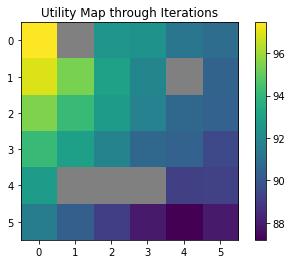

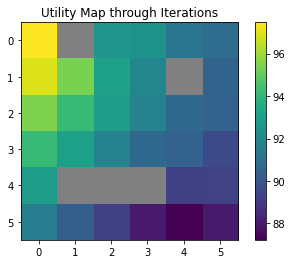

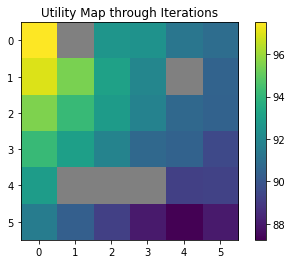

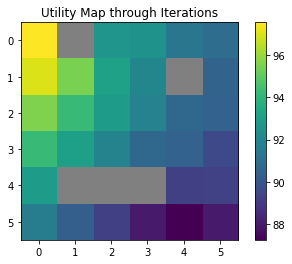

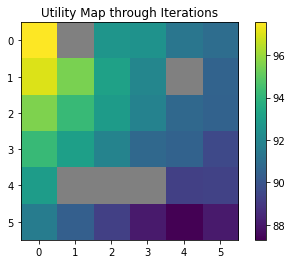

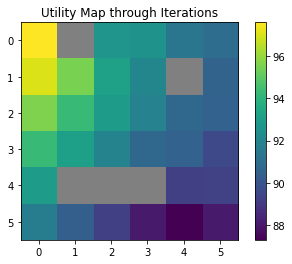

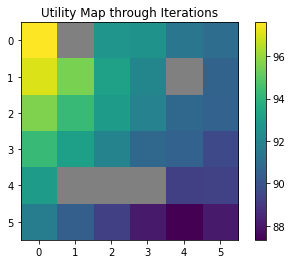

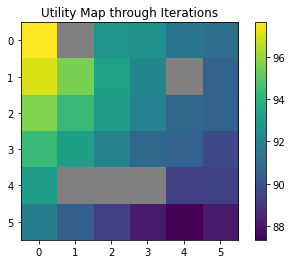

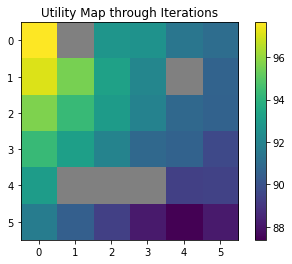

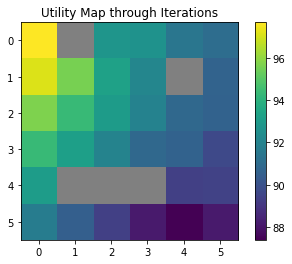

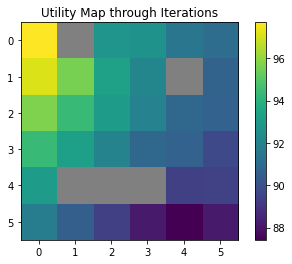

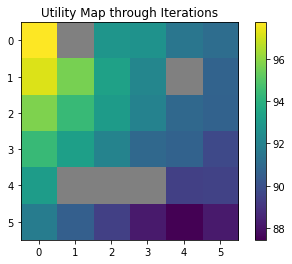

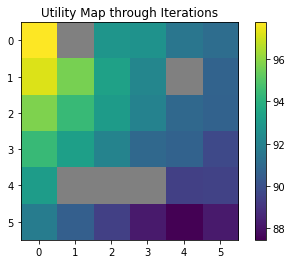

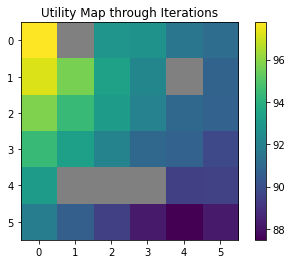

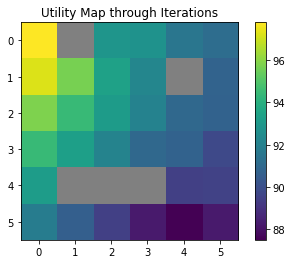

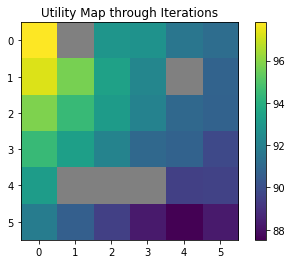

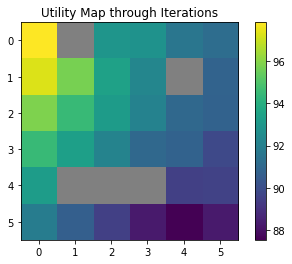

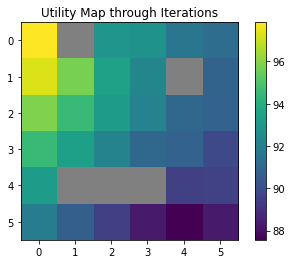

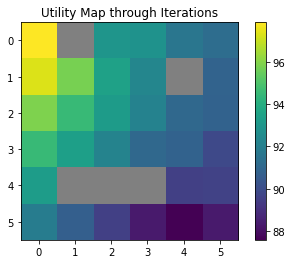

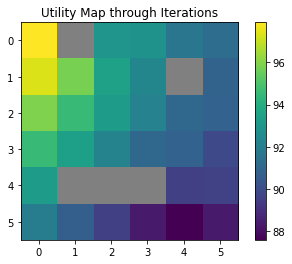

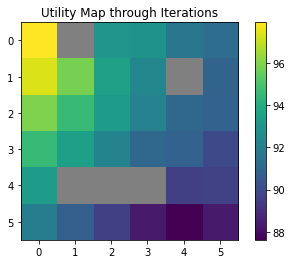

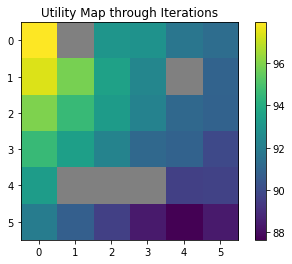

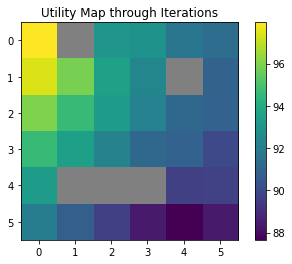

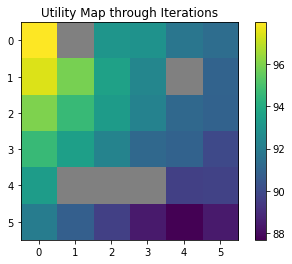

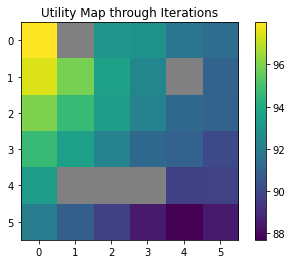

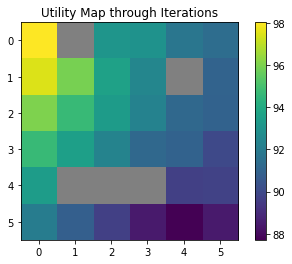

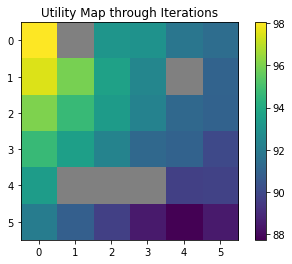

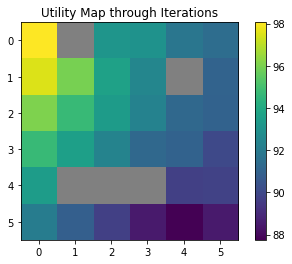

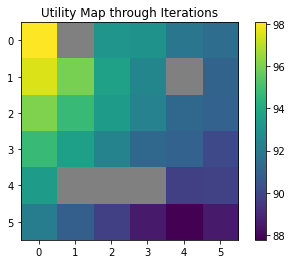

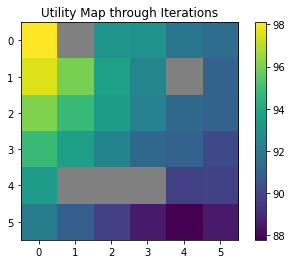

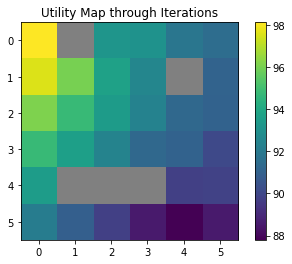

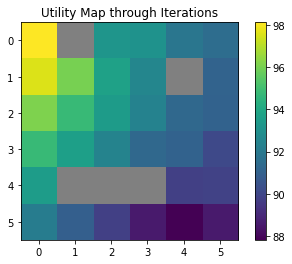

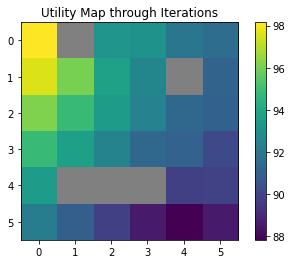

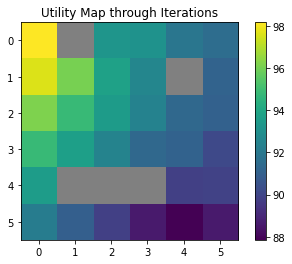

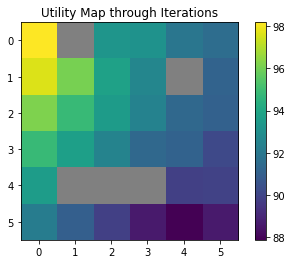

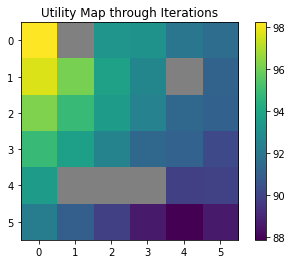

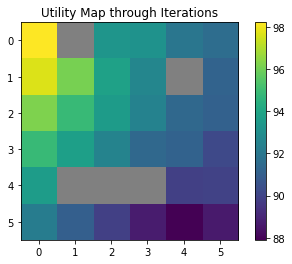

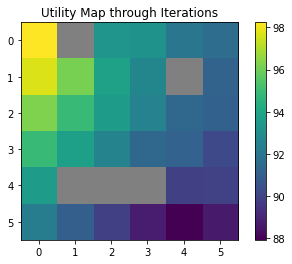

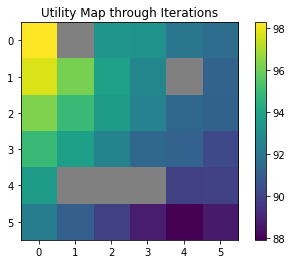

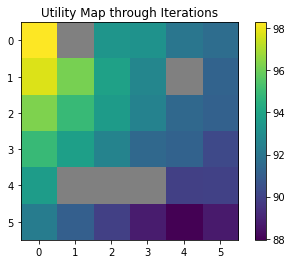

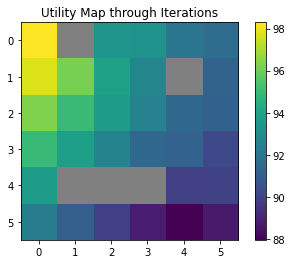

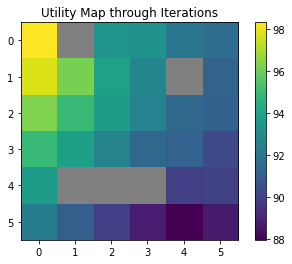

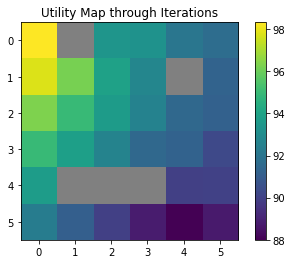

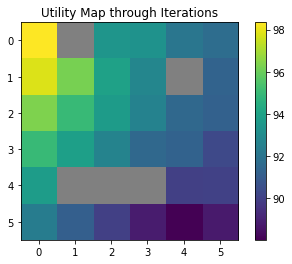

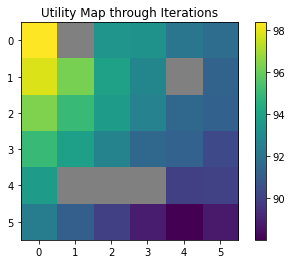

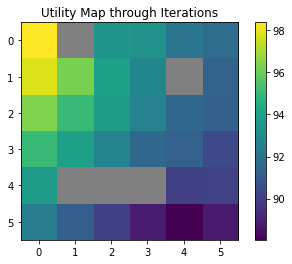

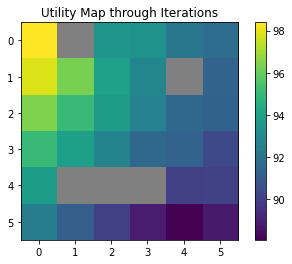

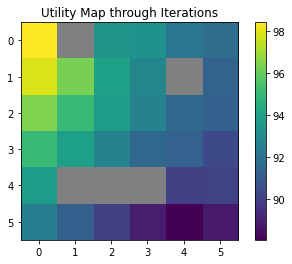

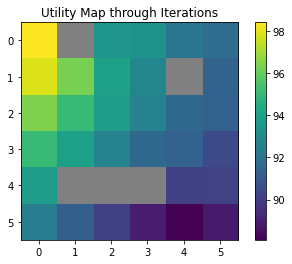

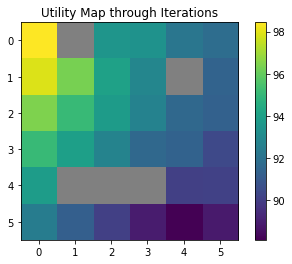

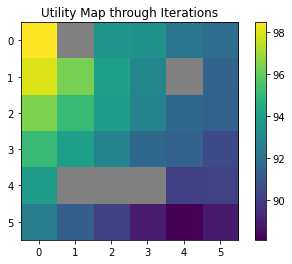

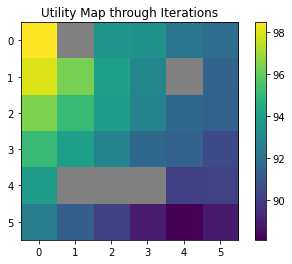

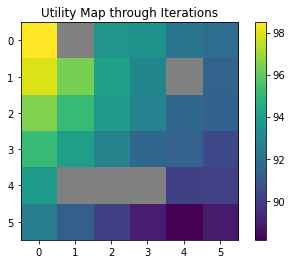

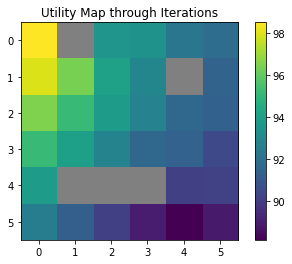

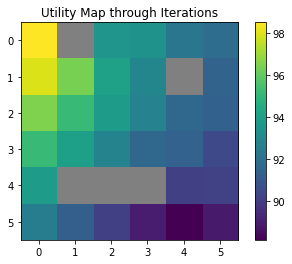

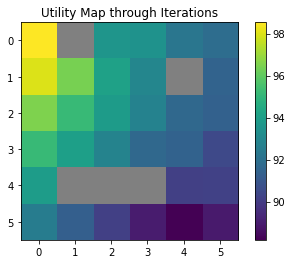

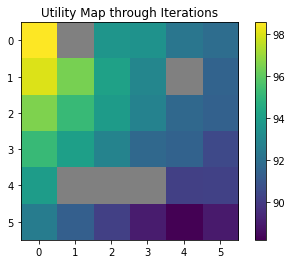

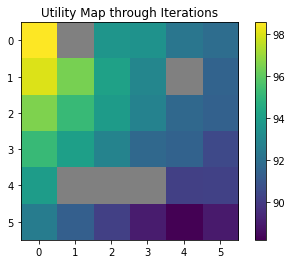

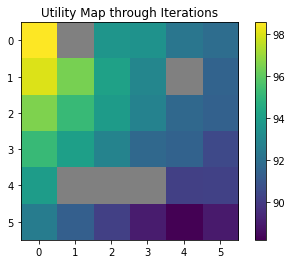

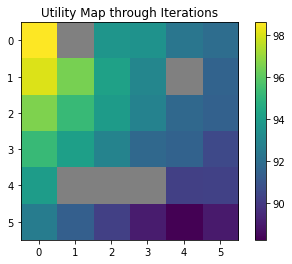

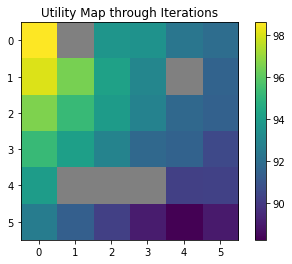

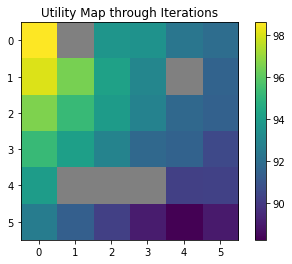

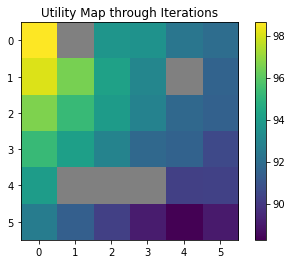

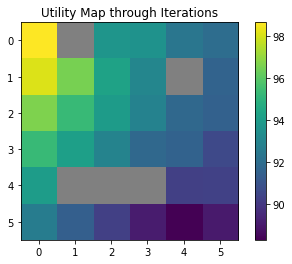

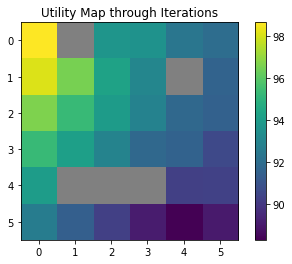

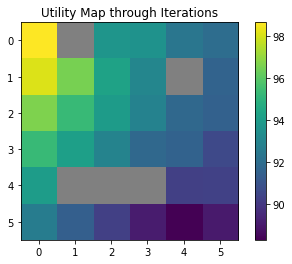

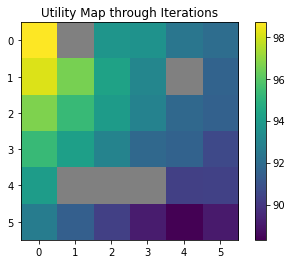

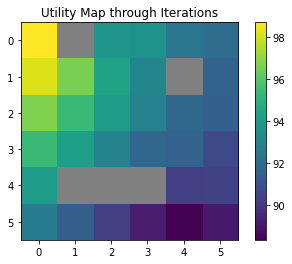

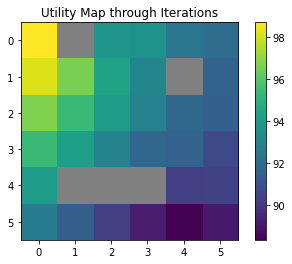

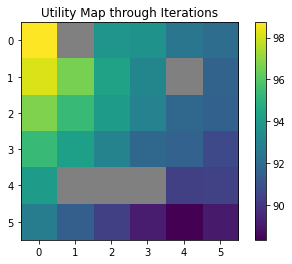

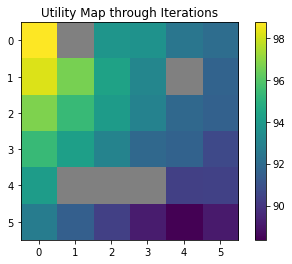

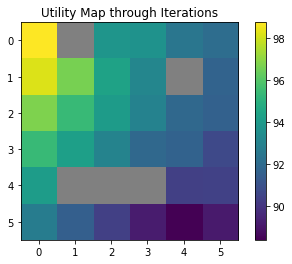

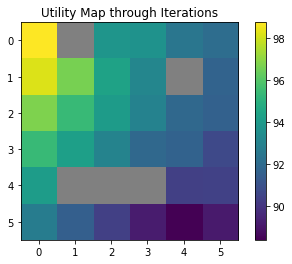

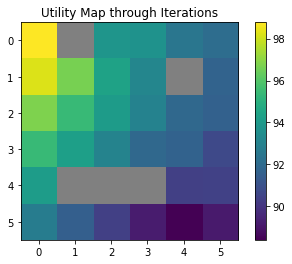

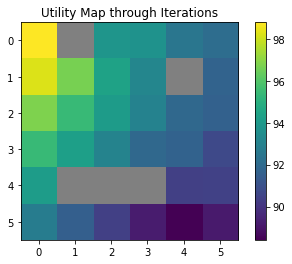

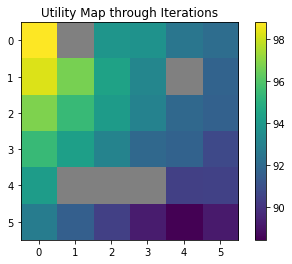

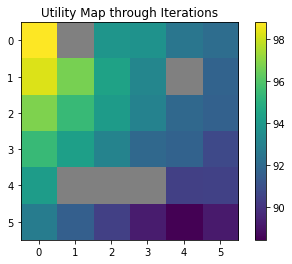

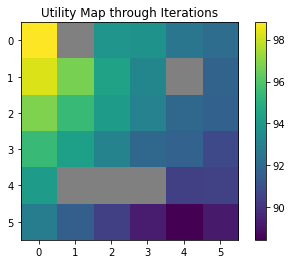

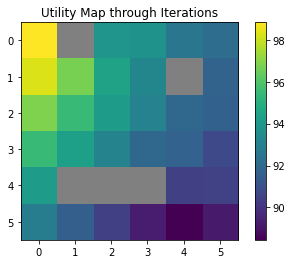

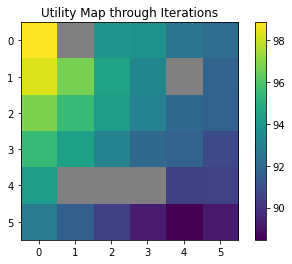

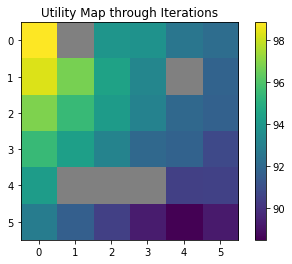

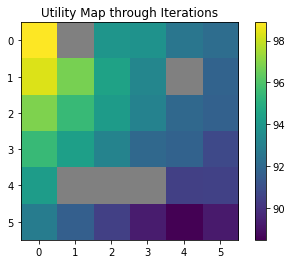

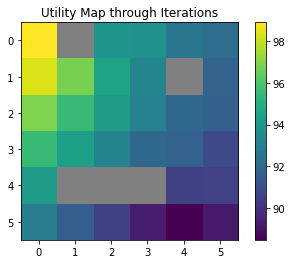

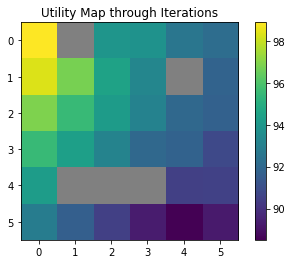

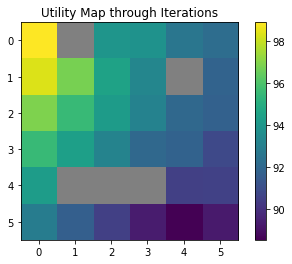

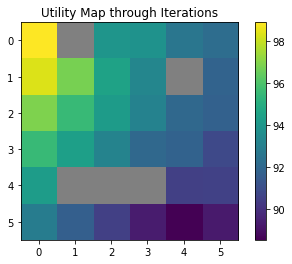

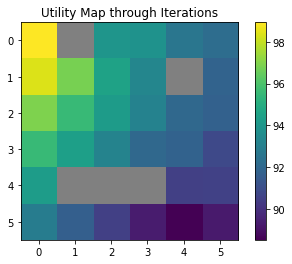

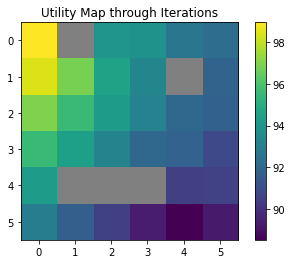

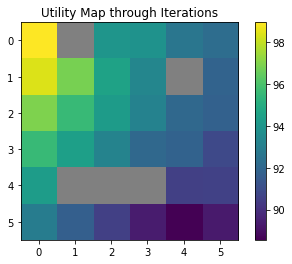

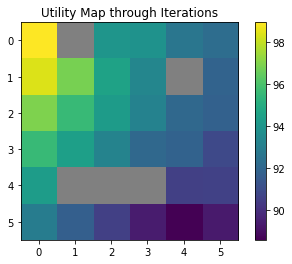

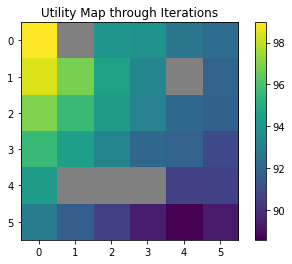

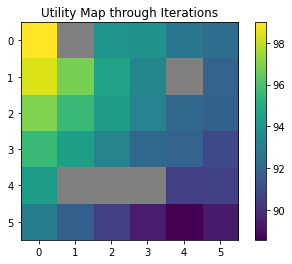

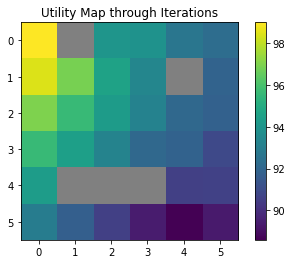

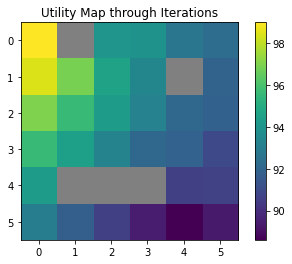

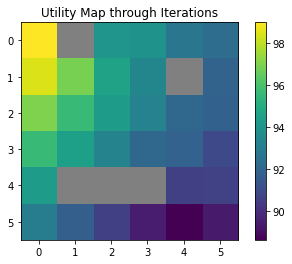

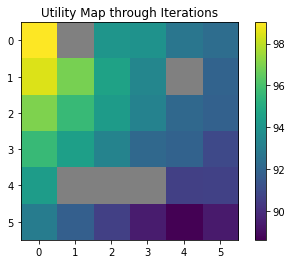

The number of iteration is: 460


In [4]:
#maximum error variable
ERROR = 1
count = 0 
iteration_till_convergence = 0
while ERROR > THETA:
#for i in range(30):
    ERROR = 0
    for row in range(6):
        for column in range(6):
            max_value = float('-inf')
            old_v = get_value([row,column],state_value)

            #find best action
            for a in action:
                new_value = value_of_action([row,column],a,map)
                max_value = max(new_value, max_value)

            #update state_value
            state_value[row][column] = max_value
            ERROR = max(ERROR,abs(old_v-max_value))
    iteration_till_convergence+=1
    display_2d_list_with_highlight(state_value, get_wall_list(map))

print('The number of iteration is:',iteration_till_convergence)

## Final Utility Table


In [5]:
print_state_utility(state_value,get_wall_list(map))

99.01782355409752	Wall	94.0478750278212	93.92583075079818	92.70249401684488	92.34193227070286	
98.4566635766064	96.90170235712276	94.59291135941919	93.40536401510388	Wall	91.9363959782559	
97.008250636812	95.64308553724604	94.31274899145345	93.23279796124342	92.11821217559081	91.85865350279144	
95.61028618939447	94.50729462972356	93.28946651826703	92.135081849772	91.87832340407154	90.91133384909007	
94.36591938959157	Wall	Wall	Wall	90.56918584270687	90.63622534280256	
92.98754288028447	91.77592811403275	90.57944370164614	89.39790075596753	88.61927486915897	89.3632861904407	


## Final Policy Table
### We obtain the final policy table by 1-step look-ahead and pick the best action for each state

In [6]:
for row in range(6):
    for column in range(6):
        max_value= float('-inf')
        for a in action:
            a_value = value_of_action([row,column],a,map)
            if a_value >= max_value:
                max_value = a_value
                new_action = a
        policy_table[row][column] = new_action

print_policy(policy_table,get_wall_list(map))
        
            
    

Up	Wall	Left	Left	Left	Up	
Up	Left	Left	Left	Wall	Up	
Up	Left	Left	Up	Left	Left	
Up	Left	Left	Up	Up	Up	
Up	Wall	Wall	Wall	Up	Up	
Up	Left	Left	Left	Up	Up	
